<a href="https://colab.research.google.com/github/JavierElizondo1/Coder-Data-Science2/blob/main/Proyecto_final_MBA_clasification_JAVIER_ELIZONDO_TREVINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA Admission

# 1. Abstracto con motivación y audiencia

#Objetivo
Construir un modelo de clasificación que pueda predecir con precisión si un solicitante será admitido en una universidad específica. Este modelo se basará en una variedad de características o variables predictoras que se sabe que influyen en las decisiones de admisión. El modelo resultante debe ser capaz de generalizar bien a nuevos datos, es decir, debe mantener un alto nivel de precisión y fiabilidad cuando se aplique a solicitudes no vistas previamente.


## Motivación:
El proceso de admisión universitaria es crucial tanto para las instituciones educativas como para los aspirantes. Analizar los datos de admisión puede ayudar a identificar patrones y factores clave que influyen en la decisión de admitir o rechazar a un estudiante. Este análisis no solo optimiza el proceso de selección, sino que también promueve la equidad y la transparencia en las decisiones de admisión.

## Audiencia:

1. Administradores y Personal de Admisiones

Eficiencia en el Proceso: Los administradores están interesados en optimizar el proceso de admisión para que sea más eficiente, reduciendo el tiempo y los recursos necesarios para evaluar cada solicitud.

Toma de Decisiones Basada en Datos: Quieren tomar decisiones fundamentadas y justas, basándose en datos objetivos y análisis cuantitativos.

Transparencia: Los datos y análisis ayudan a justificar las decisiones tomadas, aumentando la transparencia y la confianza en el proceso.


2. Comité de Admisiones

Criterios de Selección: El comité se beneficia de un análisis detallado que les permita entender mejor cuáles son los factores clave que determinan el éxito académico y profesional de los solicitantes.

Equidad: Utilizan los datos para asegurarse de que las decisiones de admisión sean equitativas y no estén sesgadas.

Mejora Continua: Buscan mejorar continuamente sus criterios y procesos de selección para atraer a los mejores candidatos.


3. Solicitantes y Estudiantes Potenciales

Transparencia y Claridad: Los solicitantes quieren entender claramente los criterios de admisión y cómo sus perfiles se comparan con los de otros candidatos.

Mejora del Perfil: La información derivada del análisis puede ayudar a los futuros solicitantes a mejorar sus perfiles para aumentar sus posibilidades de admisión.

Confianza en el Proceso: Al saber que las decisiones se toman de manera justa y basada en datos, los solicitantes pueden tener más confianza en el proceso.


4. Investigadores y Académicos

Estudios y Publicaciones: Los investigadores utilizan los datos de admisión para realizar estudios sobre tendencias educativas, eficacia de los procesos de selección y equidad en la educación superior.

Innovación: Pueden desarrollar nuevos modelos y métodos para mejorar la precisión y la equidad de los procesos de admisión.


5. Instituciones Financieras y Becas

Asignación de Recursos: Las instituciones que otorgan becas utilizan datos de admisión para asegurarse de que sus recursos se asignen a los candidatos más prometedores y necesitados.

Evaluación del Impacto: Analizan cómo las becas influyen en las tasas de admisión y el éxito académico, ajustando sus programas según sea necesario.


6. Gobiernos y Organismos Reguladores

Políticas Educativas: Los datos ayudan a los gobiernos a formular políticas educativas que promuevan la equidad y el acceso a la educación superior.

Monitoreo y Evaluación: Utilizan los análisis para monitorear el desempeño de las instituciones educativas y asegurar que cumplan con las normativas y estándares establecidos.



# 2. Resumen de metadata

*   gender: Género del solicitante (Masculino, Femenino)
*   international: Estudiante internacional (VERDADERO/FALSO)
*   gpa: Promedio de calificaciones del solicitante (en una escala de 4.0)
*   major: Carrera de pregrado (Negocios, STEM, Humanidades)
*   race: Antecedentes raciales del solicitante (por ejemplo, Blanco, Negro, Asiático, Hispano, Otro / estudiante internacional)
*   gmat: Puntuación GMAT del solicitante (800 puntos)
*   work_exp: Número de años de experiencia laboral (Años)
*   work_industry: Industria de la experiencia laboral previa del solicitante (por ejemplo, Consultoría, Finanzas, Tecnología, etc.)
*   Age: Edad en numero
*   Recomendation letter: (Regular, Buena, Excelente)
*   Personal interview score: 1, 2, 3, 4, 5 (Donde 1 es la peor calificacion y 5 la mejor)
*   Income: Salario anual en dolares
*   Marital status: estado civil (Soltero, Casado)
*   admission: Estado de admisión (Admitido, Rechazado)


# Importar las bibliotecas necesarias

In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"
import warnings
warnings.filterwarnings("ignore")


# Cargar y explorar el dataset

In [542]:
# Cargar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/JavierElizondo1/Coder-Data-Science2/aed3c1ad1c9147b53e8eefbd24a46739151cb324/MBA1.csv')


In [543]:
# Mostrar las primeras filas del dataset
df.head(10)

,gender,international,gpa,major,race,gmat,Work_exp,Work_industry,Age,Recomendation letter,Personal interview Score,Income,Marital status,Admission
0,Female,False,3.30,Business,Asian,620,3,Financial Services,30,Excellent,3,"$106,303.00",married,Admit
1,Male,False,3.28,Humanities,Black,680,5,Investment Management,37,Good,3,"$93,439.00",married,Deny
2,Female,True,3.30,Business,International,710,5,Technology,28,Excellent,4,"$134,565.00",married,Admit
3,Male,False,3.47,STEM,Black,690,6,Technology,36,Excellent,4,"$140,704.00",married,Deny
4,Male,False,3.35,STEM,Hispanic,590,5,Consulting,32,Excellent,5,"$156,887.00",married,Deny
5,Male,False,3.18,Business,White,610,6,Consulting,31,Good,4,"$113,273.00",Unmarried,Deny
6,Female,False,2.93,STEM,Other,590,3,Technology,29,Good,4,"$132,530.00",married,Admit
7,Male,True,3.02,Business,International,630,6,Financial Services,34,Excellent,3,"$147,671.00",married,Deny
8,Male,False,3.24,Business,White,590,2,Nonprofit/Gov,26,Good,4,"$67,742.00",married,Deny
9,Male,False,3.27,Humanities,Asian,690,3,Consulting,29,Excellent,2,"$175,100.00",married,Deny


# Información general del dataset

In [544]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    6194 non-null   object 
 1   international             6194 non-null   bool   
 2   gpa                       6194 non-null   float64
 3   major                     6194 non-null   object 
 4   race                      6194 non-null   object 
 5   gmat                      6194 non-null   int64  
 6   Work_exp                  6194 non-null   int64  
 7   Work_industry             6194 non-null   object 
 8   Age                       6194 non-null   int64  
 9   Recomendation letter      6194 non-null   object 
 10  Personal interview Score  6194 non-null   int64  
 11  Income                    6194 non-null   object 
 12  Marital status            6194 non-null   object 
 13  Admission                 6194 non-null   object 
dtypes: bool(

# Estadísticas descriptivas

In [545]:
# Estadísticas descriptivas
df.describe()

,gpa,gmat,Work_exp,Age,Personal interview Score
count,6194.000000,6194.000000,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952,31.451566,3.620923
std,0.151541,49.294883,1.032432,3.520326,1.196362
min,2.650000,570.000000,1.000000,23.000000,1.000000
25%,3.150000,610.000000,4.000000,28.000000,3.000000
50%,3.250000,650.000000,5.000000,31.000000,4.000000
75%,3.350000,680.000000,6.000000,34.000000,5.000000
max,3.770000,780.000000,9.000000,37.000000,5.000000


# Verificar valores nulos

In [546]:
# Verificar valores nulos
(df.isnull().sum()/df.shape[0])*100

,0
gender,0.0
international,0.0
gpa,0.0
major,0.0
race,0.0
gmat,0.0
Work_exp,0.0
Work_industry,0.0
Age,0.0
Recomendation letter,0.0


# Lista de Preguntas y/o Hipótesis

## Hipótesis 1:
Los estudiantes con un GPA más alto tienen una mayor probabilidad de ser admitidos.

## Hipótesis 2:
Los estudiantes con puntajes GMAT más altos tienen una mayor probabilidad de ser admitidos.

## Hipótesis 3:
La experiencia laboral en ciertas industrias (e.g., Consultoría, Tecnología) aumenta la probabilidad de admisión.

## Hipótesis 4:
Los estudiantes internacionales tienen diferentes tasas de admisión en comparación con los estudiantes nacionales.






# Preprocesamiento de datos

# Análisis exploratorio de datos (EDA)

# Primero revisaremos la cantidad de aplicantes.

In [547]:
# Cantidad de aplicantes

print(f"Cantidad de aplicantes: {len(df)}")

Cantidad de aplicantes: 6194


Punto importante para entrenar y seleccionar el modelo es que tenemos desbalance de clases


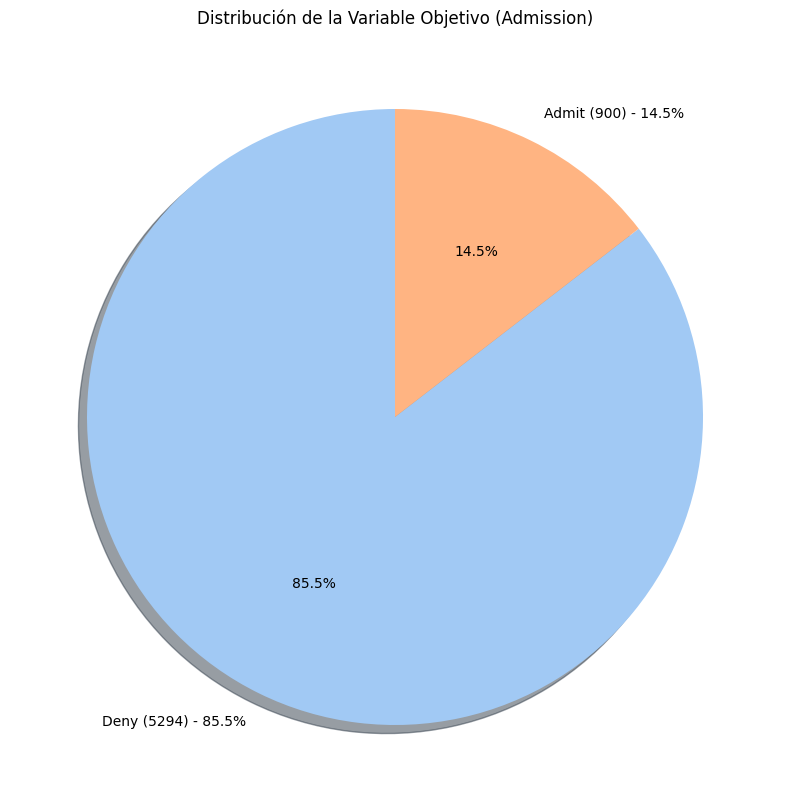

In [548]:
# Distribución de la variable objetivo

# Calcular las frecuencias de cada categoría en la columna 'Admission'
admission_counts = df['Admission'].value_counts()

# Crear etiquetas personalizadas que incluyan conteo y porcentaje
labels = [
    f"{label} ({count}) - {count / admission_counts.sum():.1%}"
    for label, count in zip(admission_counts.index, admission_counts)
]

# Crear la gráfica de pastel
plt.figure(figsize=(10, 10))
plt.pie(
    admission_counts,
    labels=labels,  # Etiquetas con conteos y porcentajes
    autopct='%1.1f%%',  # Mostrar porcentajes dentro del gráfico
    colors=sns.color_palette("pastel"),  # Usar una paleta de colores pastel
    startangle=90,  # Rotar para que inicie desde arriba
    shadow=True  # Agregar sombras
)

# Agregar título
print("Punto importante para entrenar y seleccionar el modelo es que tenemos desbalance de clases")
plt.title('Distribución de la Variable Objetivo (Admission)')
plt.show()


# Cuantos son Mujeres y Hombres.

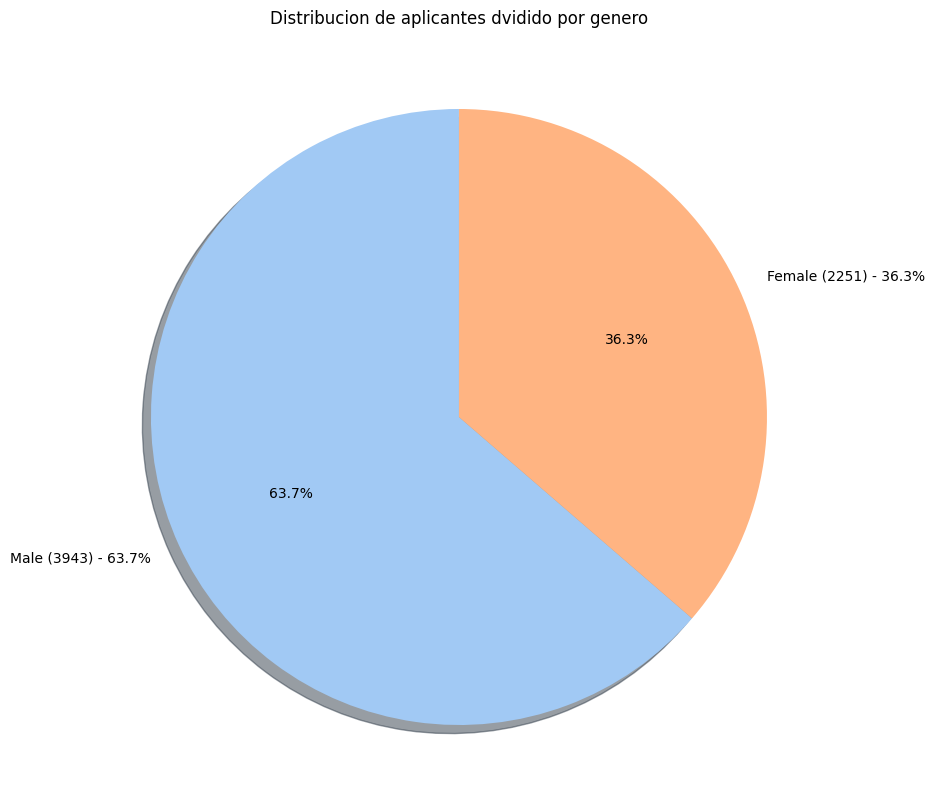

In [549]:
# Calcular las frecuencias de cada categoría en la columna 'gender'
gender_counts = df['gender'].value_counts()

# Crear una lista con etiquetas que incluyan conteos y porcentajes
labels = [
    f"{label} ({count}) - {count / gender_counts.sum():.1%}"
    for label, count in zip(gender_counts.index, gender_counts)
]

# Crear la gráfica de pastel con sombras
plt.figure(figsize=(10, 10))
plt.pie(
    gender_counts,
    labels=labels,  # Etiquetas personalizadas
    autopct='%1.1f%%',  # Mostrar porcentajes en el gráfico
    colors=sns.color_palette("pastel"),  # Usar una paleta de colores pastel
    startangle=90,  # Rotar el gráfico para que inicie desde la parte superior
    shadow=True  # Agregar sombras
)

# Agregar título
plt.title('Distribucion de aplicantes dvidido por genero')
plt.show()



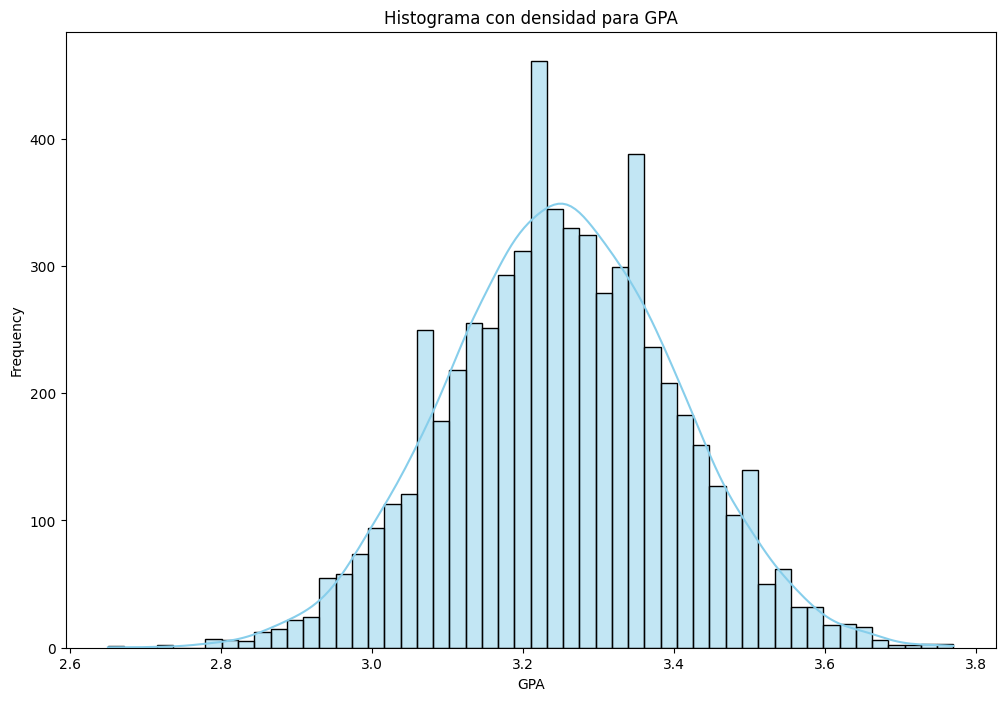

In [550]:
# Histograma con densidad para GPA
plt.figure(figsize=(12, 8))
sns.histplot(df['gpa'], kde=True, color='skyblue')
plt.title('Histograma con densidad para GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

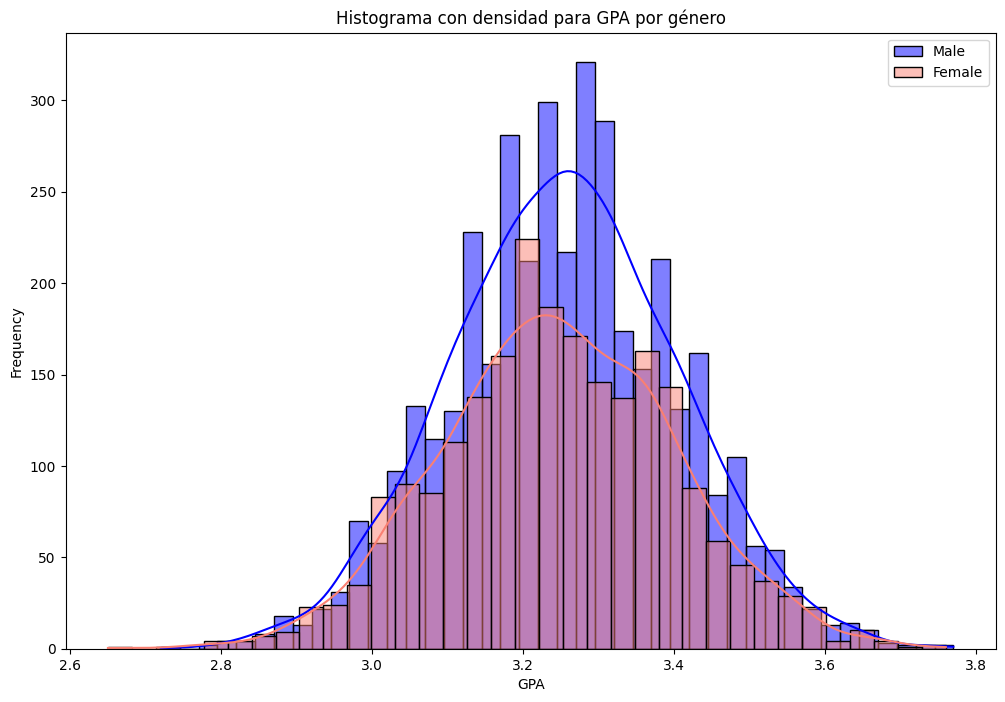

In [551]:
# Histograma con densidad para GPA por género

plt.figure(figsize=(12, 8))
sns.histplot(df[df['gender'] == 'Male']['gpa'], kde=True, color='blue', label='Male', alpha=0.5)
sns.histplot(df[df['gender'] == 'Female']['gpa'], kde=True, color='salmon', label='Female', alpha=0.5)
plt.title('Histograma con densidad para GPA por género')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend()
plt.show()

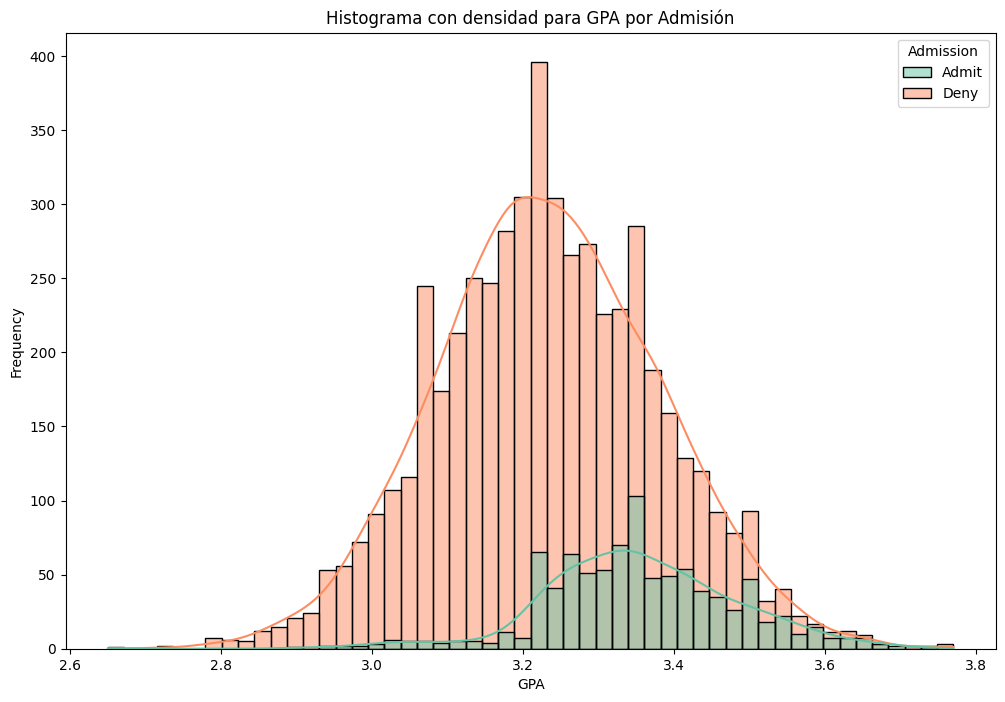

In [552]:
# prompt: Histograma con densidad para GPA por Admission palette = 'Set2'

# Histograma con densidad para GPA por Admission palette = 'Set2'
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='gpa', hue='Admission', kde=True, palette='Set2')
plt.title('Histograma con densidad para GPA por Admisión')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

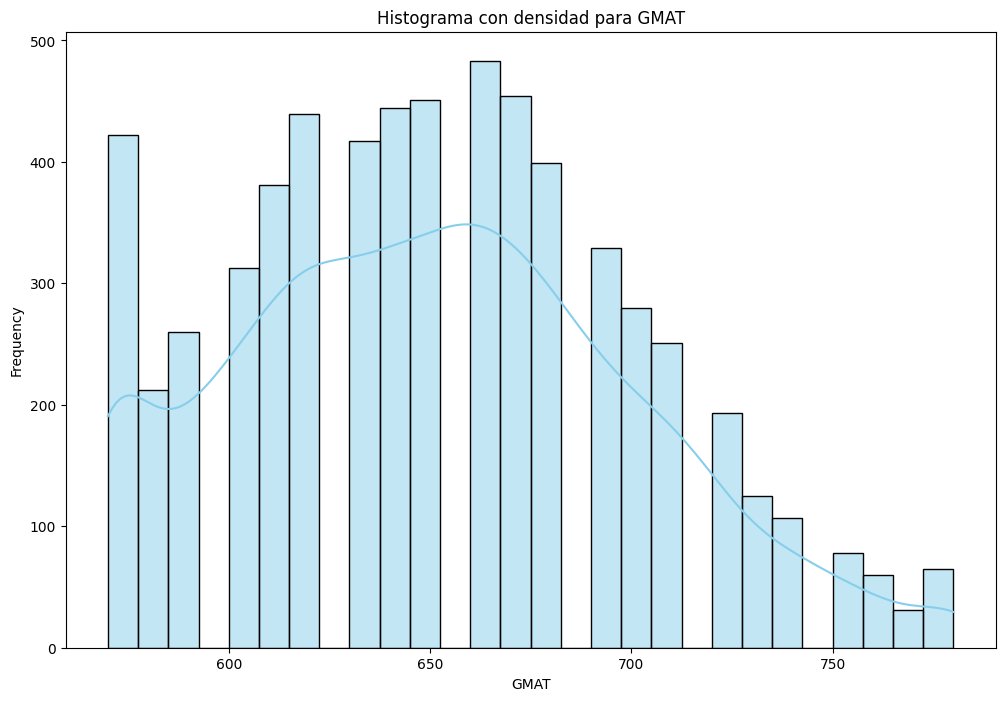

In [553]:
# Histograma con densidad para GMAT
plt.figure(figsize=(12, 8))
sns.histplot(df['gmat'], kde=True, color='skyblue')
plt.title('Histograma con densidad para GMAT')
plt.xlabel('GMAT')
plt.ylabel('Frequency')
plt.show()

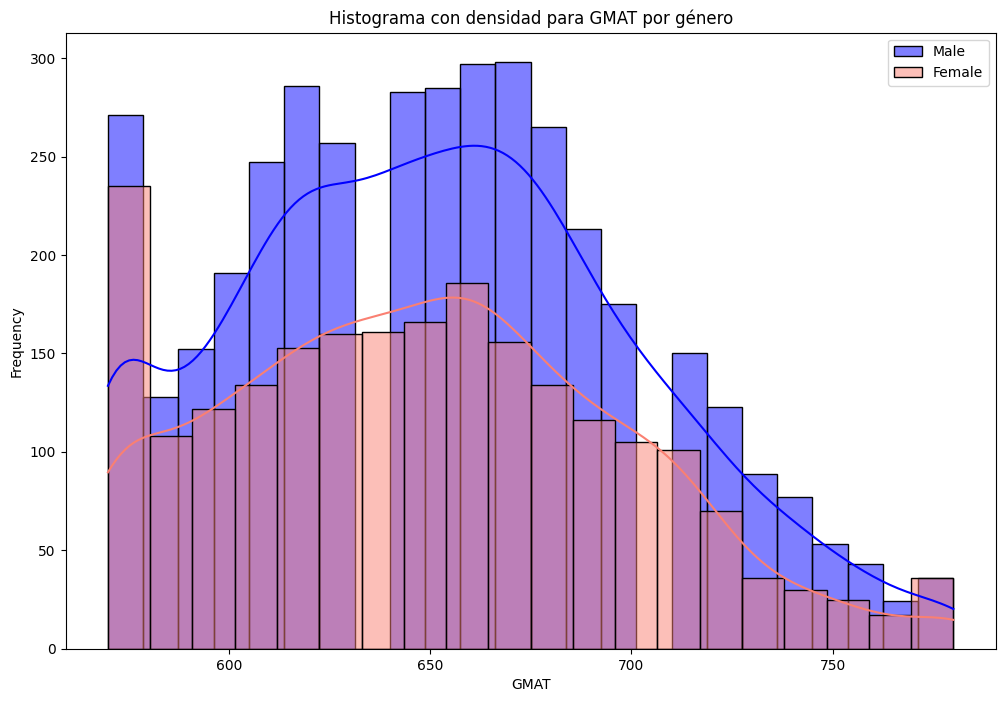

In [554]:
# Histograma con densidad para GMAT por género

plt.figure(figsize=(12, 8))
sns.histplot(df[df['gender'] == 'Male']['gmat'], kde=True, color='blue', label='Male', alpha=0.5)
sns.histplot(df[df['gender'] == 'Female']['gmat'], kde=True, color='salmon', label='Female', alpha=0.5)
plt.title('Histograma con densidad para GMAT por género')
plt.xlabel('GMAT')
plt.ylabel('Frequency')
plt.legend()
plt.show()

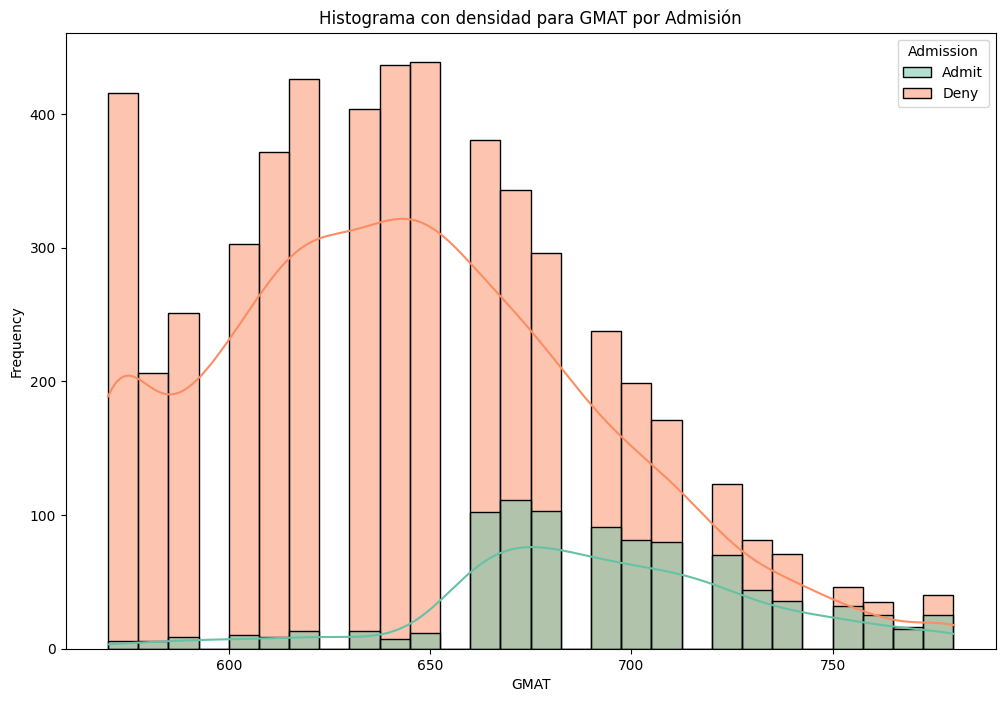

In [555]:
# prompt: Histograma con densidad para gmat por Admission palette = 'Set2'

# Histograma con densidad para GMAT por Admission palette = 'Set2'
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='gmat', hue='Admission', kde=True, palette='Set2')
plt.title('Histograma con densidad para GMAT por Admisión')
plt.xlabel('GMAT')
plt.ylabel('Frequency')
plt.show()

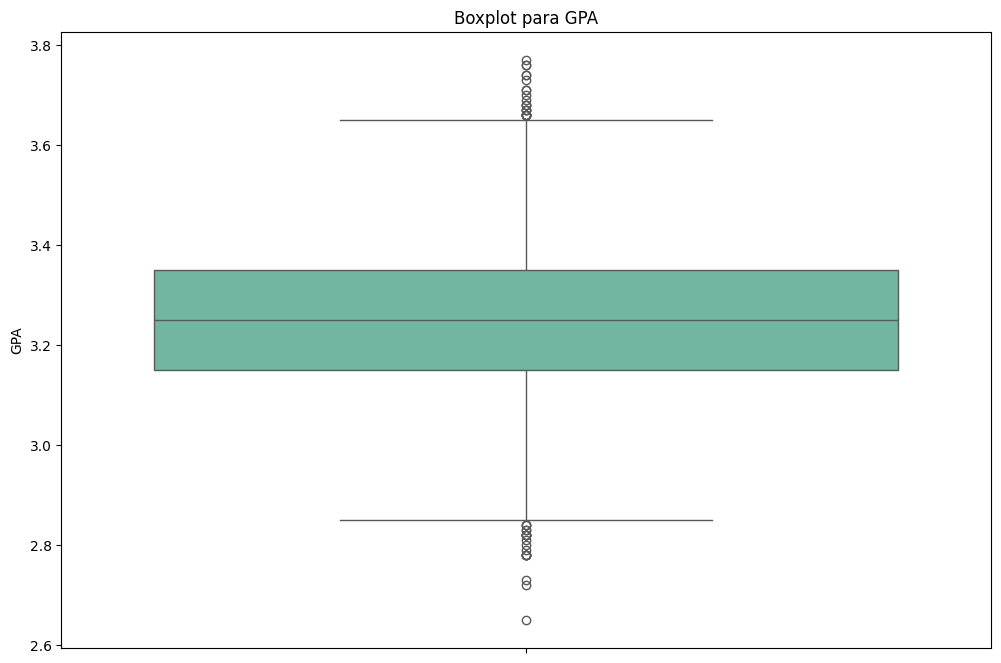

In [556]:
# Boxplot para GPA

plt.figure(figsize=(12, 8))
sns.boxplot(y='gpa', data=df, palette='Set2')
plt.title('Boxplot para GPA')
plt.ylabel('GPA')
plt.show()

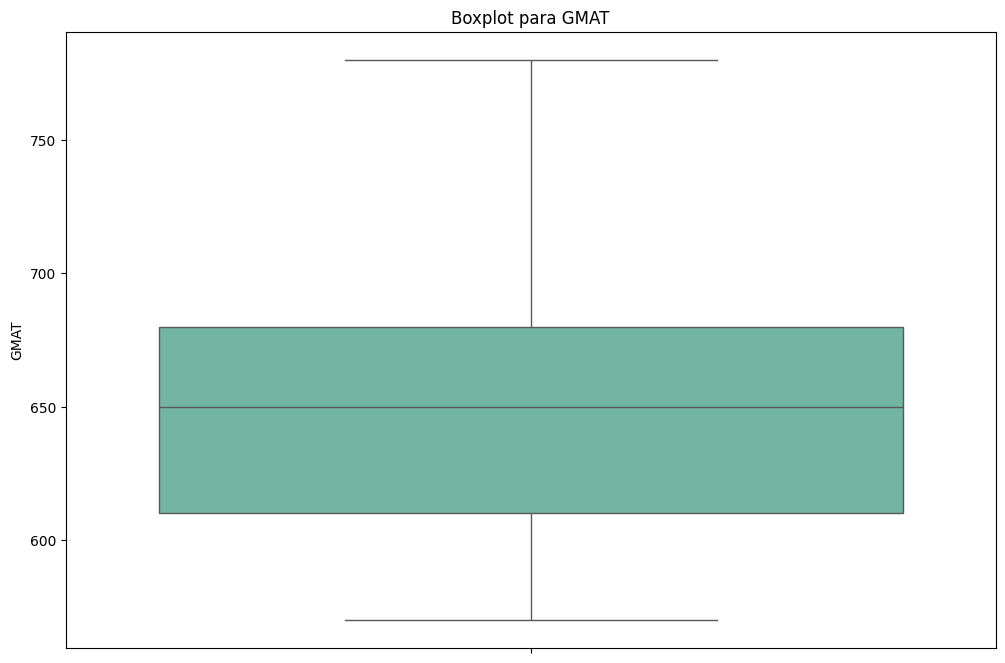

In [557]:
# Boxplot para GMAT

plt.figure(figsize=(12, 8))
sns.boxplot(y='gmat', data=df, palette='Set2')
plt.title('Boxplot para GMAT')
plt.ylabel('GMAT')
plt.show()

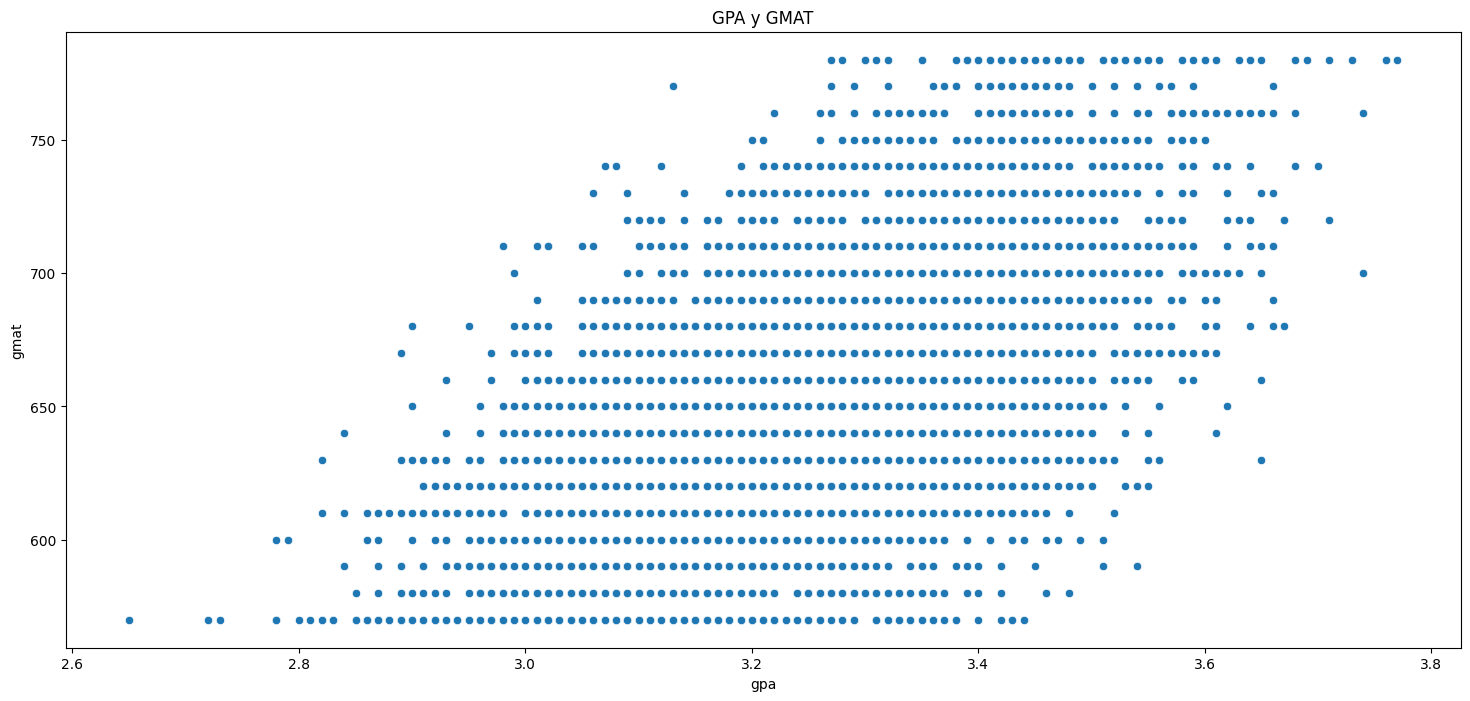

In [558]:
# scater para GPA y GMAT
plt.figure(figsize=(18, 8))
sns.scatterplot(x='gpa', y='gmat', data=df, palette='Set2')
plt.title('GPA y GMAT')
plt.show()

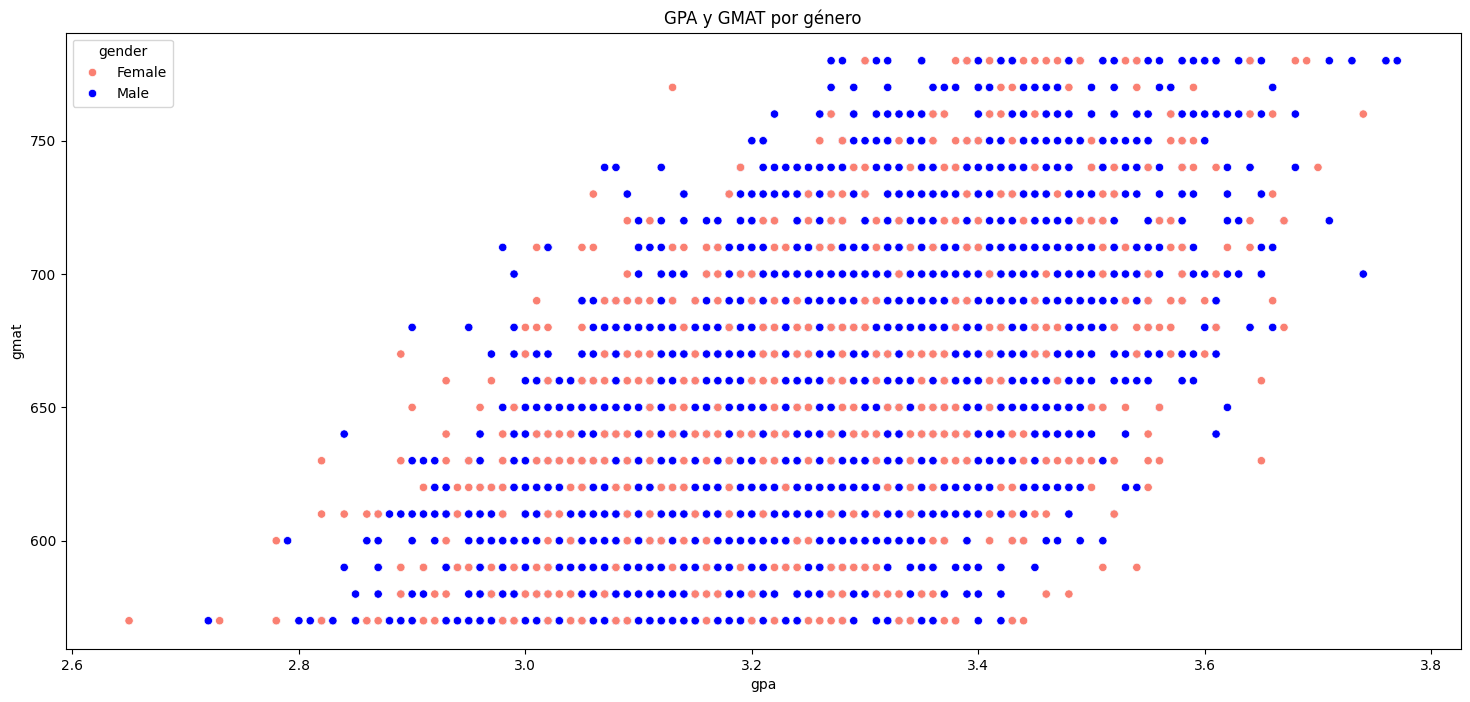

In [559]:
# prompt: scater para GPA y GMAT por genero male = blue female = salmon

# scater para GPA y GMAT por genero male = blue female = salmon
plt.figure(figsize=(18, 8))
sns.scatterplot(x='gpa', y='gmat', data=df, hue='gender', palette={'Male': 'blue', 'Female': 'salmon'})
plt.title('GPA y GMAT por género')
plt.show()

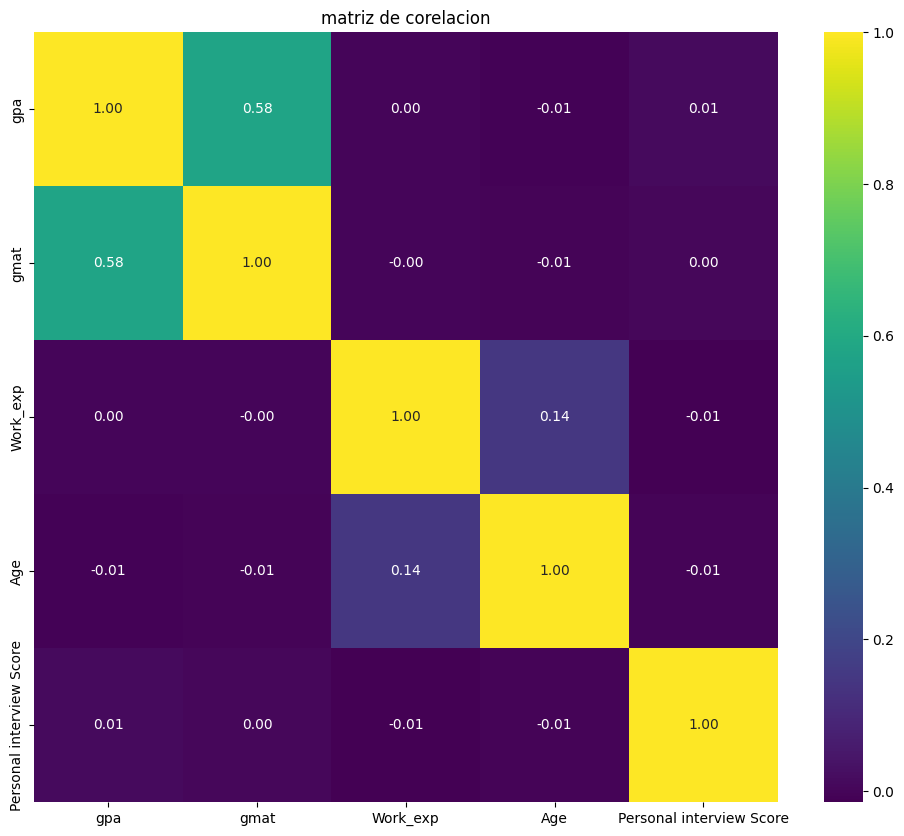

In [560]:
# matriz de corelacion

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("matriz de corelacion")
plt.show()

# Cuantas admisiones se tuvieron por genero.

Tasa de admision de Mujeres: 19.99%
Tasa de admision de Hombres: 11.41%


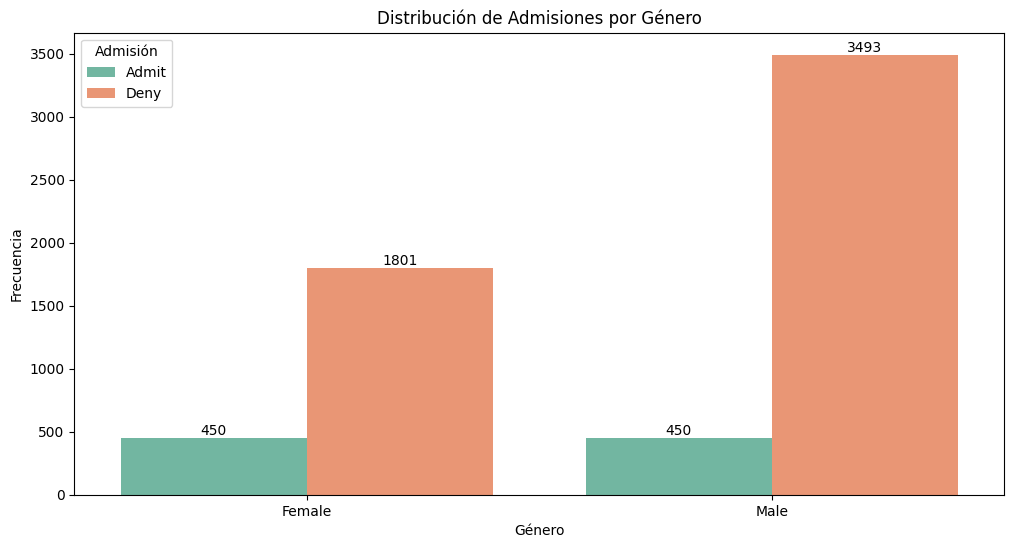

In [561]:
# Distribución de admisiones por género

# Tasa de admision de Mujeres

# Filter the DataFrame to include only male applicants
Female_applicants = df[df['gender'] == 'Female']

# Count the number of male applicants admitted
admit_Females = Female_applicants[Female_applicants['Admission'] == 'Admit'].shape[0]

# Count the total number of male applicants
total_Females = Female_applicants.shape[0]

# Calculate the percentage of admitted males
percentage_admitted_Females = (admit_Females / total_Females) * 100

print(f"Tasa de admision de Mujeres: {percentage_admitted_Females:.2f}%")

# Tasa de admision de Hombres

# Filter the DataFrame to include only male applicants
male_applicants = df[df['gender'] == 'Male']

# Count the number of male applicants admitted
admit_males = male_applicants[male_applicants['Admission'] == 'Admit'].shape[0]

# Count the total number of male applicants
total_males = male_applicants.shape[0]

# Calculate the percentage of admitted males
percentage_admitted_males = (admit_males / total_males) * 100

print(f"Tasa de admision de Hombres: {percentage_admitted_males:.2f}%")

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='gender', hue='Admission', data=df, palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.legend(title='Admisión')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Distribución de Admisiones por Género')
plt.show()


# # Hipótesis 1: Los estudiantes con un GPA más alto tienen una mayor posibilidad de ser admitidos?


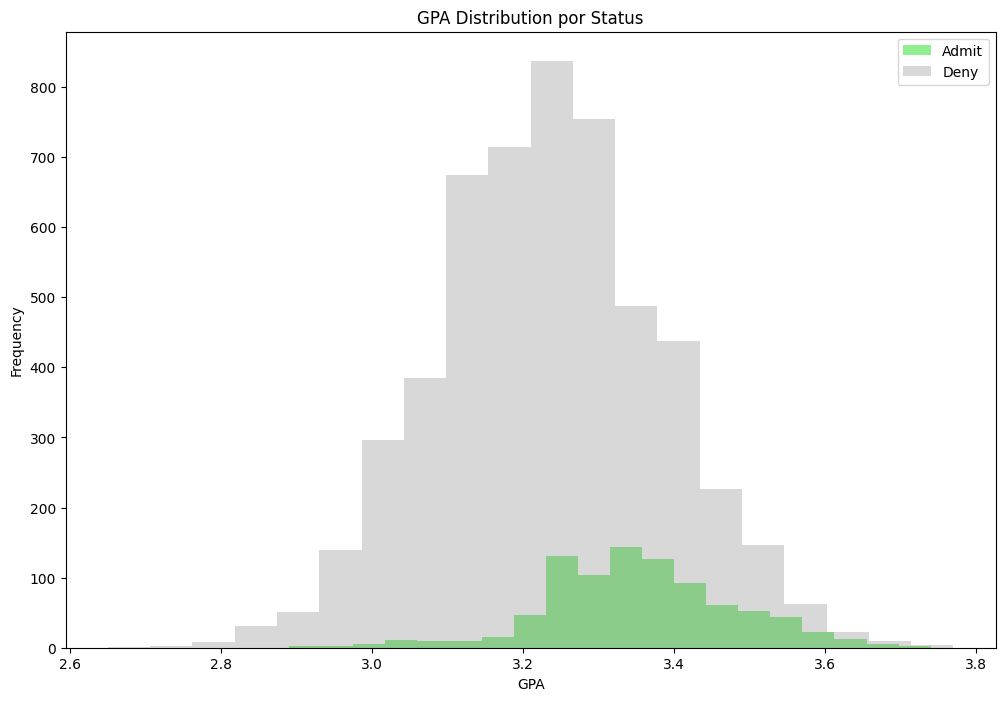

In [562]:
#GPA Distribution por Status


plt.figure(figsize=(12, 8))
plt.hist(df[df['Admission'] == 'Admit']['gpa'], bins=20, alpha=1, label='Admit', color='lightgreen')
plt.hist(df[df['Admission'] == 'Deny']['gpa'], bins=20, alpha=.3, label='Deny', color='grey')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('GPA Distribution por Status')
_ = plt.legend()



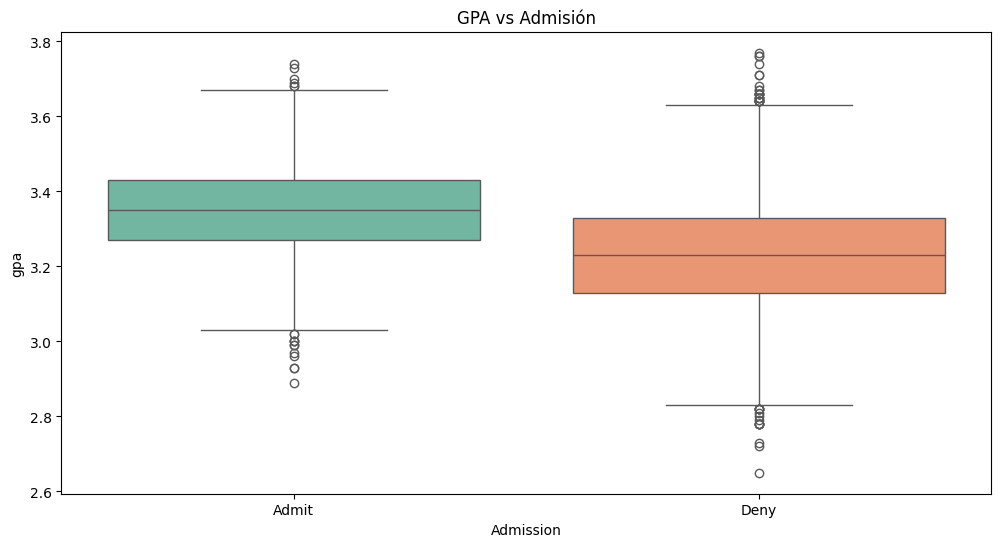

In [563]:
# Hipótesis 1: Los estudiantes con un GPA más alto tienen una mayor probabilidad de ser admitidos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Admission', y='gpa', data=df, palette='Set2')
plt.title('GPA vs Admisión')
plt.show()

# # Hipótesis 1: Los estudiantes con un GPA más alto tienen una mayor posibilidad de ser admitidos?

In [564]:
# Hipótesis 1: Los estudiantes con un GPA más alto tienen una mayor posibilidad de ser admitidos?

print("Si, los estudiantes con un GPA mayor a 3.2 tienen mayor posibilidad de ser admitidos.")

Si, los estudiantes con un GPA mayor a 3.2 tienen mayor posibilidad de ser admitidos.


# Hipótesis 2: Los estudiantes con puntajes GMAT más altos tienen una mayor probabilidad de ser admitidos?


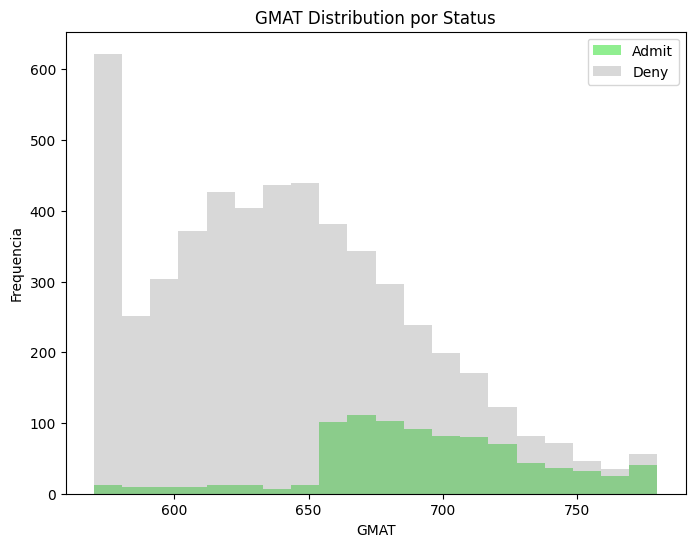

In [565]:
# GMAT Distribution por Status


plt.figure(figsize=(8, 6))
plt.hist(df[df['Admission'] == 'Admit']['gmat'], bins=20, alpha=1, label='Admit', color='lightgreen')
plt.hist(df[df['Admission'] == 'Deny']['gmat'], bins=20, alpha=.3, label='Deny', color='grey')
plt.xlabel('GMAT')
plt.ylabel('Frequencia')
plt.title('GMAT Distribution por Status')
_ = plt.legend()

In [566]:
# Hipótesis 2: Los estudiantes con puntajes GMAT más altos tienen una mayor probabilidad de ser admitidos?

print("Si, los estudiantes con un GMAT mayor a 650 tienen mayor posibilidad de ser admitidos.")

Si, los estudiantes con un GMAT mayor a 650 tienen mayor posibilidad de ser admitidos.


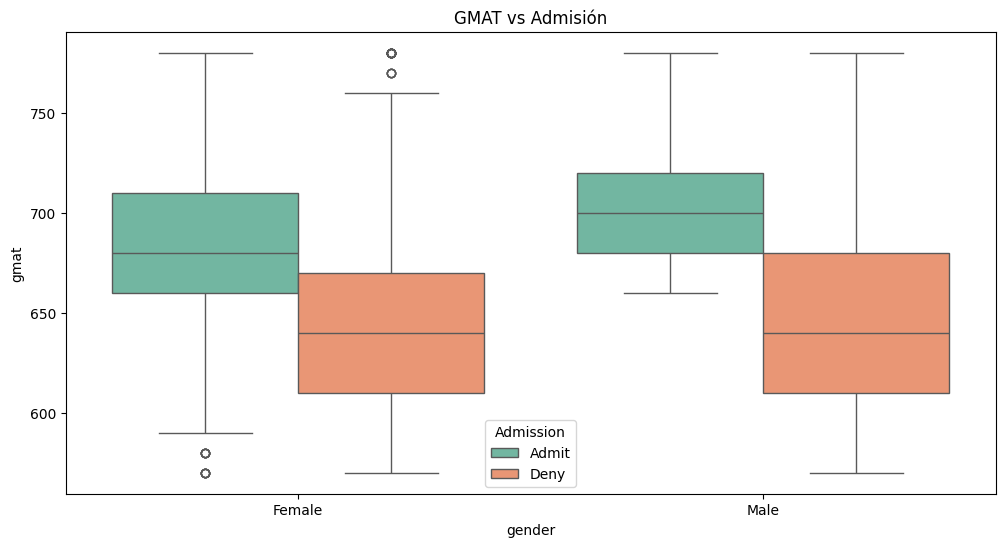

In [567]:
# Hipótesis 2: Los estudiantes con puntajes GMAT más altos tienen una mayor probabilidad de ser admitidos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='gmat', hue='Admission', data=df, palette='Set2')
plt.title('GMAT vs Admisión')
plt.show()

# Hipótesis 3: La experiencia laboral aumenta la probabilidad de admisión?

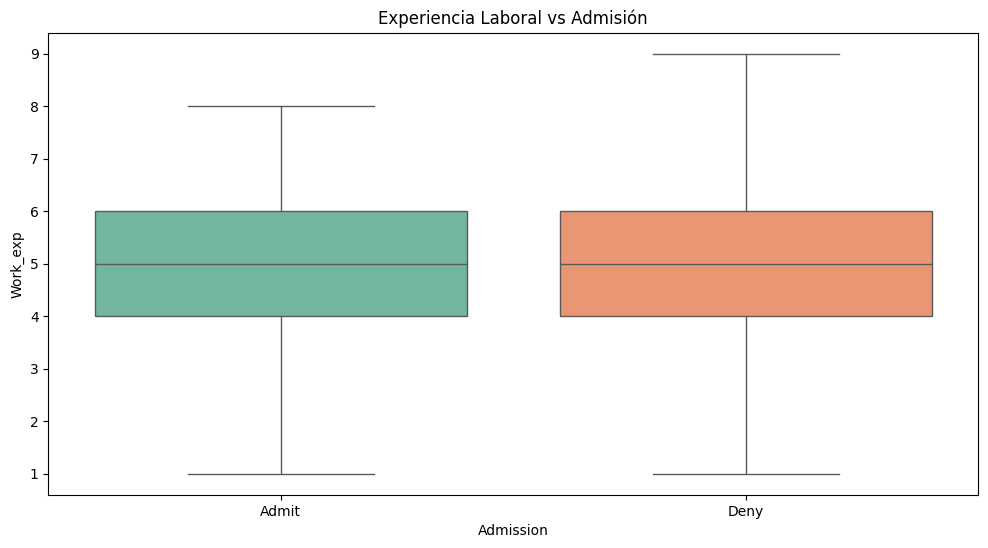

No, la experiencia laboral no aumenta la probabilidad de admisión.


In [568]:
# Hipótesis 3: La experiencia laboral aumenta la probabilidad de admisión.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Admission', y='Work_exp', data=df, palette='Set2')
plt.title('Experiencia Laboral vs Admisión')
plt.show()
print("No, la experiencia laboral no aumenta la probabilidad de admisión.")

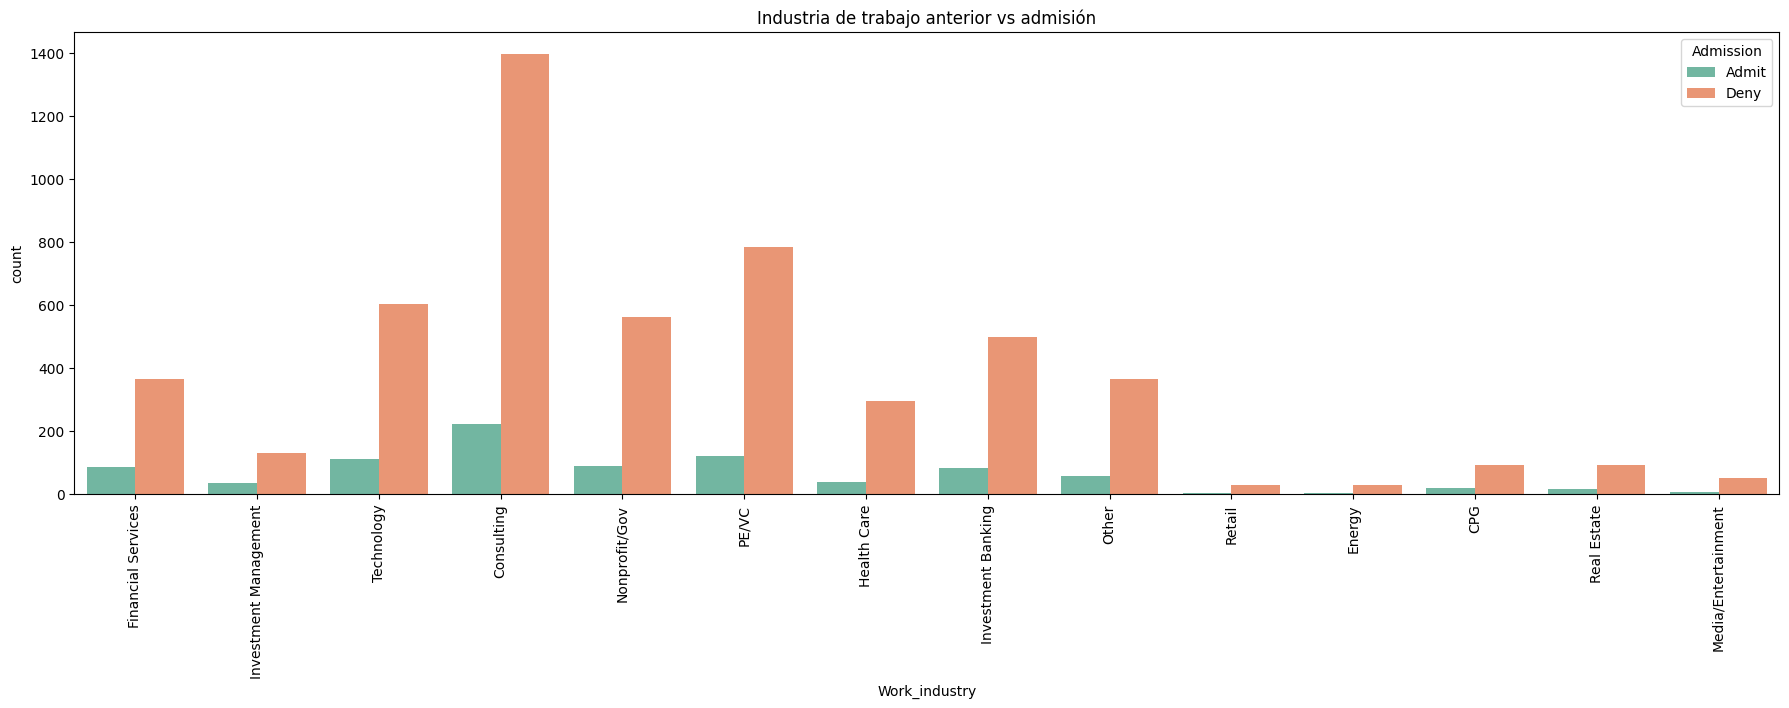

In [569]:
# Industria de trabajo anterior vs Admisión

plt.figure(figsize=(22, 6))
sns.countplot(x='Work_industry', hue='Admission', data=df, palette='Set2')
plt.title('Industria de trabajo anterior vs admisión')
plt.xticks(rotation=90)
plt.show()


Work_industry
Investment Management    21.686747
Financial Services       19.068736
CPG                      17.543860
Real Estate              16.216216
Technology               15.642458
Name: Admission, dtype: float64


Work_industry
PE/VC                  13.450937
Retail                 12.121212
Health Care            11.976048
Media/Entertainment    11.864407
Energy                  9.375000
Name: Admission, dtype: float64




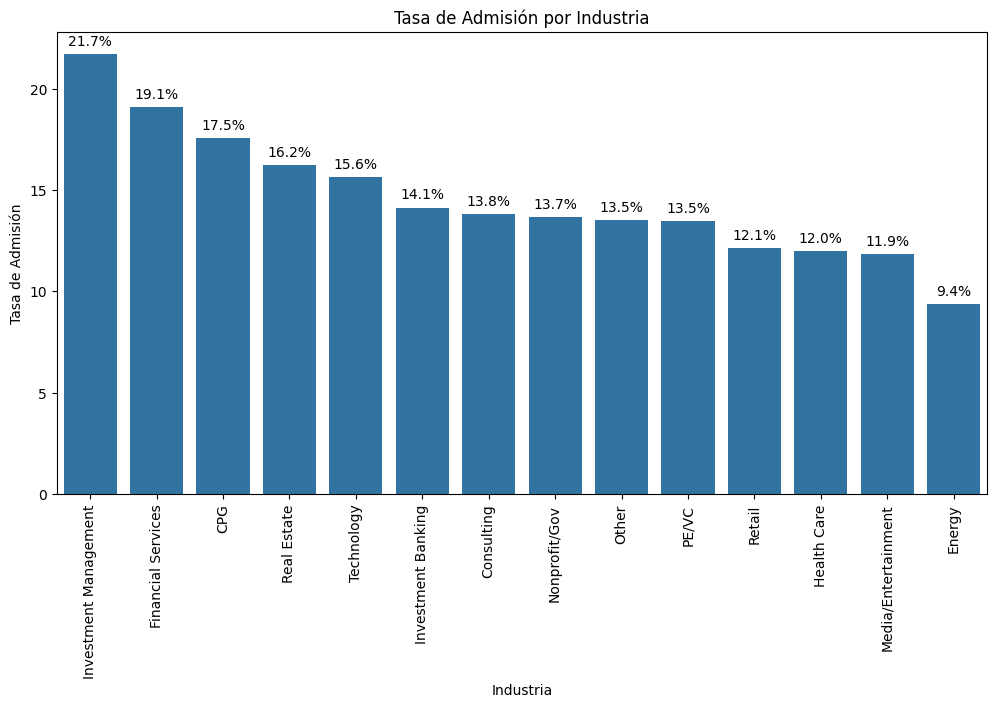

In [570]:
# La experiencia laboral en industrias como Investment Management y Financial Services parece aumentar la probabilidad de admisión.

# Agrupar por industria y calcular la tasa de admisión
admission_rates_by_industry = df.groupby('Work_industry')['Admission'].apply(lambda x: (x == 'Admit').mean()).sort_values(ascending=False)*100

# Mostrar las industrias con las tasas de admisión más altas
print(admission_rates_by_industry.head(5))
print('\n')

# Mostrar las industrias con las tasas de admisión más bajas
print(admission_rates_by_industry.tail(5))
print('\n')

# Crear un gráfico de barras para visualizar las tasas de admisión por industria
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=admission_rates_by_industry.index, y=admission_rates_by_industry.values)

# Añadir anotaciones de los porcentajes en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xticks(rotation=90)
plt.xlabel('Industria')
plt.ylabel('Tasa de Admisión')
plt.title('Tasa de Admisión por Industria')
plt.show()



# Hipótesis 4: Los estudiantes internacionales tienen diferentes tasas de admisión en comparación con los estudiantes nacionales?

True= Aplicante internacional, False= Aplicante Nacional
international
True     15.092291
False    14.292279
Name: Admission, dtype: float64


No, los estudiantes internacionales no tienen diferentes tasas de admisión en comparación con los estudiantes nacionales, la diferencia es minima.


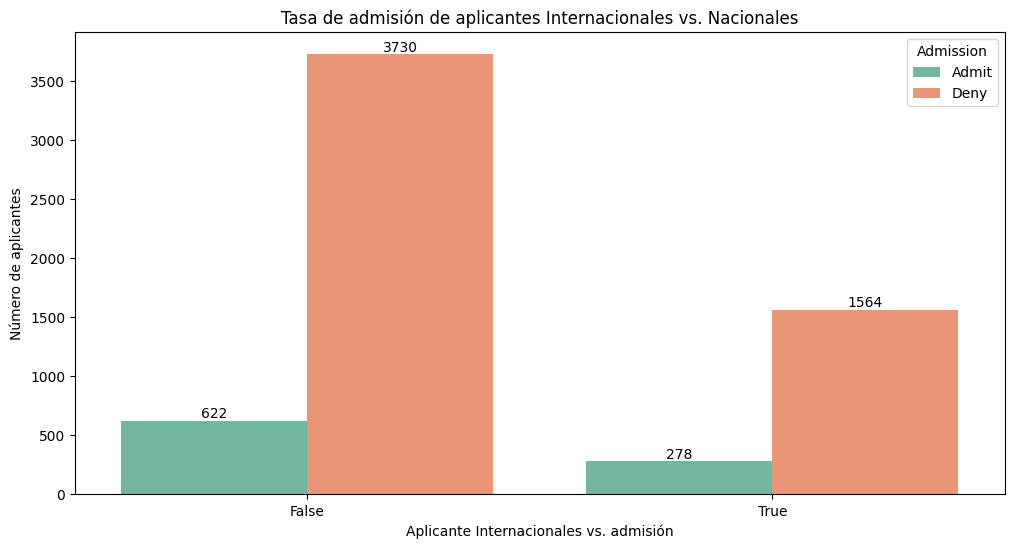

In [571]:
# Hipótesis 4: Los estudiantes internacionales tienen diferentes tasas de admisión en comparación con los estudiantes nacionales.

# Agrupar por industria y calcular la tasa de admisión
admission_rates_by_international = df.groupby('international')['Admission'].apply(lambda x: (x == 'Admit').mean()).sort_values(ascending=False)*100
# Hipótesis 4: Los estudiantes internacionales tienen diferentes tasas de admisión en comparación con los estudiantes nacionales.

# Agrupar por industria y calcular la tasa de admisión
admission_rates_by_international = df.groupby('international')['Admission'].apply(lambda x: (x == 'Admit').mean()).sort_values(ascending=False)*100

# Mostrar las industrias con las tasas de admisión más altas
print("True= Aplicante internacional, False= Aplicante Nacional")
print(admission_rates_by_international)
print('\n')
print("No, los estudiantes internacionales no tienen diferentes tasas de admisión en comparación con los estudiantes nacionales, la diferencia es minima.")


plt.figure(figsize=(12, 6))
ax= sns.countplot(x='international', hue='Admission', data=df, palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Aplicante Internacionales vs. admisión')
plt.ylabel('Número de aplicantes')
plt.title('Tasa de admisión de aplicantes Internacionales vs. Nacionales')
plt.show()


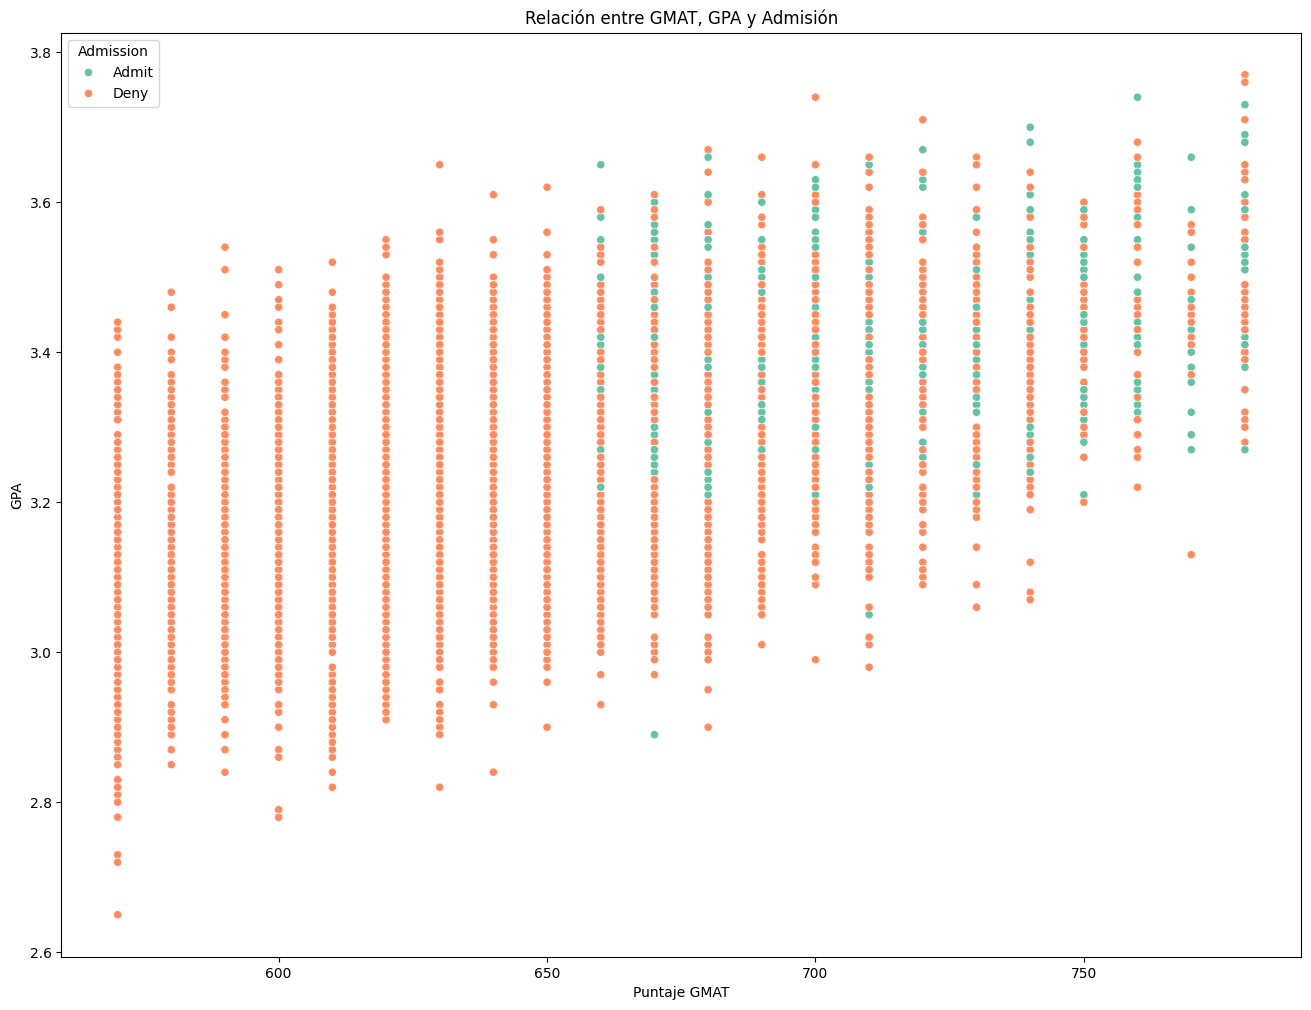

In [572]:
# Crear un diagrama de dispersión para visualizar la relación entre GMAT, GPA y admisión

plt.figure(figsize=(16, 12))
sns.scatterplot(x='gmat', y='gpa', hue='Admission', data=df, palette='Set2')
plt.title('Relación entre GMAT, GPA y Admisión')
plt.xlabel('Puntaje GMAT')
plt.ylabel('GPA')
plt.show()


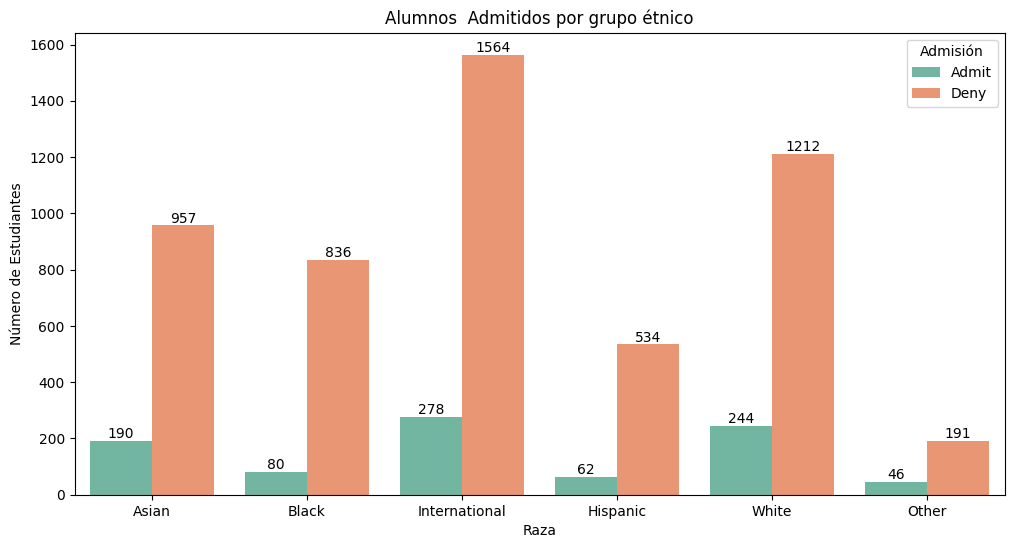

In [573]:
# Alumnos admitidos por grupo étnico

# Grafico de Alumnos admitidos por grupo étnico
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='race', hue='Admission' , data=df, palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Raza')
plt.ylabel('Número de Estudiantes')
plt.title('Alumnos  Admitidos por grupo étnico')
plt.legend(title='Admisión')
plt.show()


race
Other            19.409283
White            16.758242
Asian            16.564952
International    15.092291
Hispanic         10.402685
Black             8.733624
Name: Admission, dtype: float64


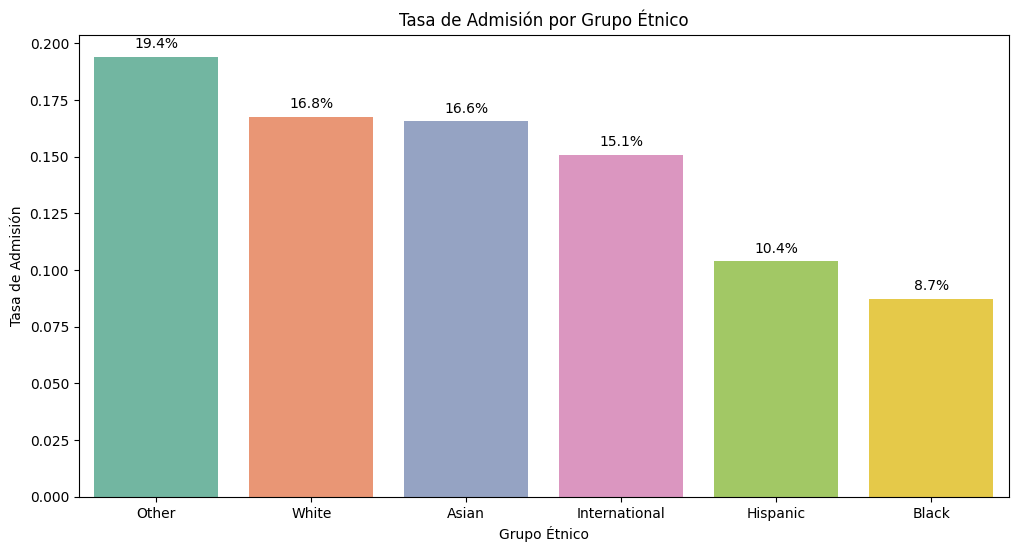

In [574]:
# Calcular las tasas de admisión por grupo étnico
admission_rates_by_race = df.groupby('race')['Admission'].apply(lambda x: (x == 'Admit').mean()).sort_values(ascending=False)

# Imprimir las tasas de admisión
print(admission_rates_by_race * 100)

# Crear una gráfica de barras para visualizar las tasas de admisión por grupo étnico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=admission_rates_by_race.index, y=admission_rates_by_race.values, palette='Set2')

# Añadir anotaciones de los porcentajes en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xticks(rotation=0, ha='center')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.xlabel('Grupo Étnico')
plt.ylabel('Tasa de Admisión')
plt.title('Tasa de Admisión por Grupo Étnico')
plt.show()


# Los buenos puntajes en el GMAT y GPA tienen una mayor Posibilidad de ser admitidos.

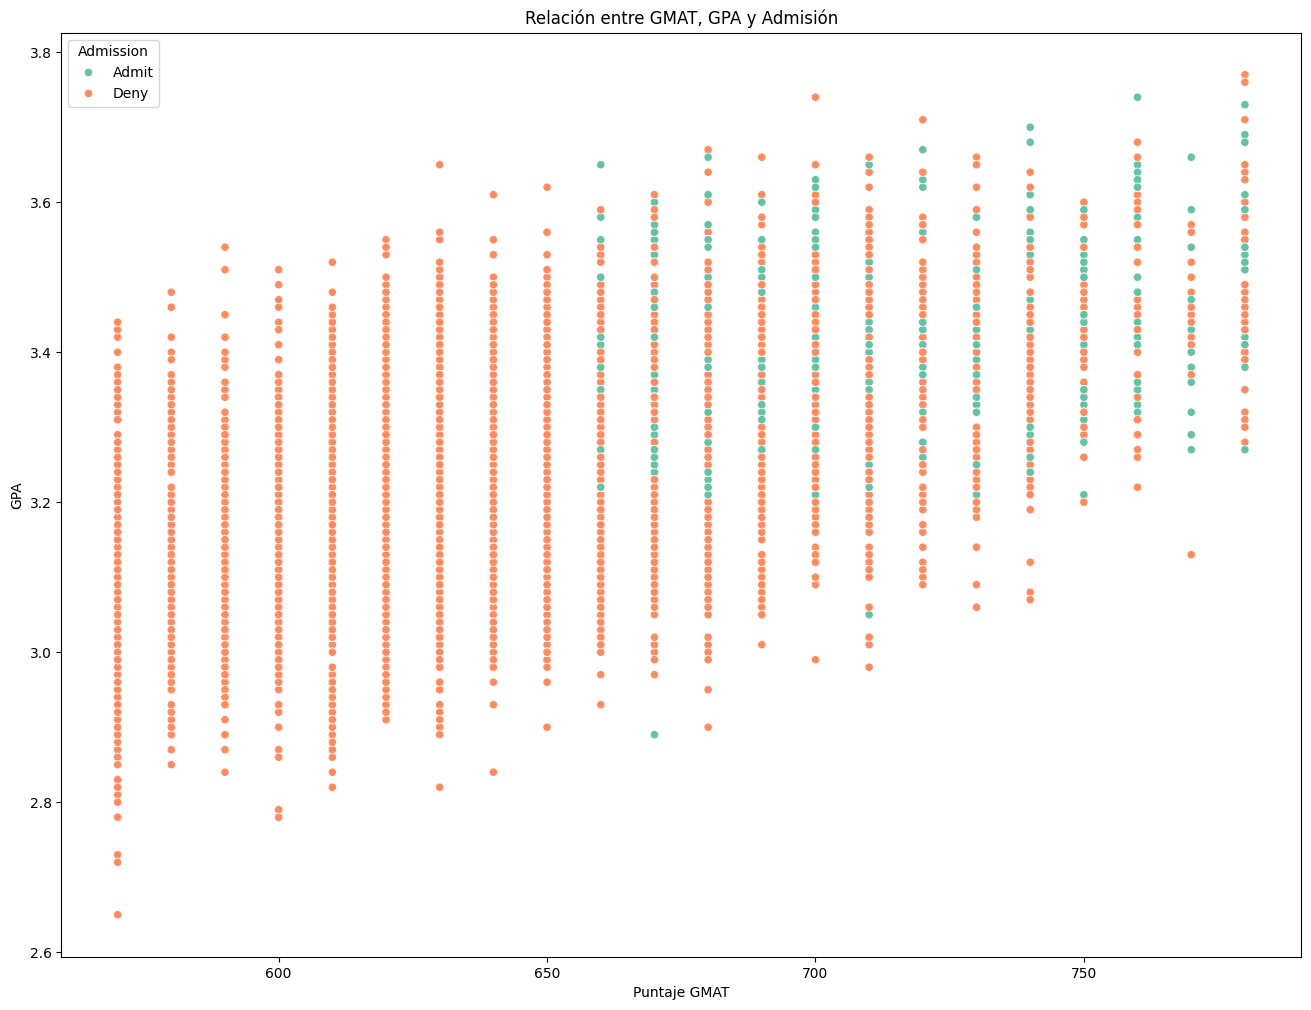

In [575]:
# Los buenos puntajes en el GMAT y GPA tienen una mayor posibilidad de ser admitidos.

# Crear un diagrama de dispersión para visualizar la relación entre GMAT, GPA y admisión
plt.figure(figsize=(16, 12))
sns.scatterplot(x='gmat', y='gpa', hue='Admission', data=df, palette='Set2')
plt.title('Relación entre GMAT, GPA y Admisión')
plt.xlabel('Puntaje GMAT')
plt.ylabel('GPA')
plt.show()




# Resumen de Hallazgos del Proyecto

## Distribución de Admisiones por Género:
Las mujeres tienen una tasa de admisión relativamente alta en comparación con los hombres, y son admitidas con menor relacion de GPA y GMAT.

## Impacto del GPA:
Los estudiantes con un GPA de 3.5 o más tienen una mayor probabilidad de ser admitidos.

## Puntaje GMAT:
Un puntaje GMAT alto (700 o más) tiene una mayor probabilidad de admisión.

## Estudiantes Internacionales:
Los estudiantes internacionales con buenos puntajes en el GMAT y un GPA alto tienen una mayor probabilidad de ser admitidos.

## Experiencia Laboral:
La experiencia laboral en industrias como Investment Management y Financial Services parece aumentar la probabilidad de admisión, especialmente cuando se combina con un buen GPA y puntaje GMAT.

## Raza y Admisión:
Los estudiantes Nacionales tienen mayor probabilidad de ser aceptados que los Internacionales. y dentro de los estudiantes nacionales los blancos y asiáticos con buenos puntajes en el GMAT y GPA altos tienen una mayor probabilidad de ser admitidos.

# Procedemos a entrenar el modelo

# Ingenieria de Atributos

## Se trabaja con la transformacion de datos

In [576]:
# Procedemos a entrenar el modelo

X = df.drop("Admission", axis=1).copy()
y = df.Admission.copy()

In [577]:
X

,gender,international,gpa,major,race,gmat,Work_exp,Work_industry,Age,Recomendation letter,Personal interview Score,Income,Marital status
0,Female,False,3.30,Business,Asian,620,3,Financial Services,30,Excellent,3,"$106,303.00",married
1,Male,False,3.28,Humanities,Black,680,5,Investment Management,37,Good,3,"$93,439.00",married
2,Female,True,3.30,Business,International,710,5,Technology,28,Excellent,4,"$134,565.00",married
3,Male,False,3.47,STEM,Black,690,6,Technology,36,Excellent,4,"$140,704.00",married
4,Male,False,3.35,STEM,Hispanic,590,5,Consulting,32,Excellent,5,"$156,887.00",married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,False,3.49,Business,White,640,5,Other,34,Excellent,3,"$71,895.00",married
6190,Male,False,3.18,STEM,Black,670,4,Consulting,37,Good,3,"$181,058.00",married
6191,Female,True,3.22,Business,International,680,5,Health Care,35,Good,3,"$101,725.00",married
6192,Male,True,3.36,Business,International,590,5,Other,30,Good,4,"$62,993.00",married


In [578]:
# Adjust the column name if necessary

X['Income'] = X['Income'].str.replace('$', '', regex=False) # Remove the dollar sign
X['Income'] = X['Income'].str.replace(',', '', regex=False) # Remove commas
X['Income'] = X['Income'].str.replace(' ', '', regex=False) # Remove Spaces
X['Income'] = X['Income'].astype(float) # Convert to float

In [579]:
X

,gender,international,gpa,major,race,gmat,Work_exp,Work_industry,Age,Recomendation letter,Personal interview Score,Income,Marital status
0,Female,False,3.30,Business,Asian,620,3,Financial Services,30,Excellent,3,106303.0,married
1,Male,False,3.28,Humanities,Black,680,5,Investment Management,37,Good,3,93439.0,married
2,Female,True,3.30,Business,International,710,5,Technology,28,Excellent,4,134565.0,married
3,Male,False,3.47,STEM,Black,690,6,Technology,36,Excellent,4,140704.0,married
4,Male,False,3.35,STEM,Hispanic,590,5,Consulting,32,Excellent,5,156887.0,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,False,3.49,Business,White,640,5,Other,34,Excellent,3,71895.0,married
6190,Male,False,3.18,STEM,Black,670,4,Consulting,37,Good,3,181058.0,married
6191,Female,True,3.22,Business,International,680,5,Health Care,35,Good,3,101725.0,married
6192,Male,True,3.36,Business,International,590,5,Other,30,Good,4,62993.0,married


In [580]:
y

,Admission
0,Admit
1,Deny
2,Admit
3,Deny
4,Deny
...,...
6189,Deny
6190,Deny
6191,Admit
6192,Deny


In [581]:
y.unique()

array(['Admit', 'Deny'], dtype=object)

In [582]:
y.value_counts(normalize=True)*100

,proportion
Admission,
Deny,85.469809
Admit,14.530191


In [583]:
from sklearn.model_selection import train_test_split

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .5, random_state=42, stratify=y)

In [585]:
X_train

,gender,international,gpa,major,race,gmat,Work_exp,Work_industry,Age,Recomendation letter,Personal interview Score,Income,Marital status
3913,Male,True,3.23,Humanities,International,630,6,Consulting,31,Good,4,90897.0,married
4458,Male,False,3.33,Business,White,610,5,Technology,33,Excellent,4,123222.0,married
4848,Male,False,3.48,STEM,Hispanic,660,5,Consulting,31,Excellent,3,211631.0,Unmarried
657,Female,False,3.17,Business,Other,570,6,Other,35,Good,3,81765.0,Unmarried
1380,Male,False,3.53,Business,White,690,5,Nonprofit/Gov,30,Good,3,55289.0,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,Male,True,2.98,Humanities,International,710,5,Consulting,29,Excellent,4,163056.0,Unmarried
1781,Female,False,3.02,Humanities,Black,620,4,Consulting,35,Good,3,206372.0,married
5348,Male,False,3.22,Business,White,700,6,Technology,30,Excellent,3,124412.0,married
4193,Female,True,3.41,Humanities,International,670,6,Real Estate,36,Good,5,178023.0,Unmarried


In [586]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [587]:
# Crear una instancia del OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).fit(X_train[['gender', 'international', 'major', 'race', 'Work_industry', 'Recomendation letter', 'Marital status']])


In [588]:
# Aplicar el OneHotEncoder a las columnas de texto
encoded_data = ohe.transform(X_train[['gender', 'international', 'major', 'race', 'Work_industry', 'Recomendation letter', 'Marital status']])

In [589]:
encoded_data

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [590]:
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded_data, index=X_train.index)

In [591]:
encoded_df

,gender_Female,gender_Male,international_False,international_True,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,...,Work_industry_Other,Work_industry_PE/VC,Work_industry_Real Estate,Work_industry_Retail,Work_industry_Technology,Recomendation letter_Excellent,Recomendation letter_Good,Recomendation letter_Regular,Marital status_Unmarried,Marital status_married
3913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4458,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4848,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
657,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1380,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1781,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5348,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4193,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [592]:
X_train = pd.concat([X_train, encoded_df], axis=1)

In [593]:
encoded_test = ohe.transform(X_test[['gender', 'international', 'major', 'race', 'Work_industry', 'Recomendation letter', 'Marital status']])
encoded_df_test = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded_test, index=X_test.index)

In [594]:
X_test = pd.concat([X_test, encoded_df_test], axis=1)

In [595]:
X_test

,gender,international,gpa,major,race,gmat,Work_exp,Work_industry,Age,Recomendation letter,...,Work_industry_Other,Work_industry_PE/VC,Work_industry_Real Estate,Work_industry_Retail,Work_industry_Technology,Recomendation letter_Excellent,Recomendation letter_Good,Recomendation letter_Regular,Marital status_Unmarried,Marital status_married
2789,Male,False,3.53,Humanities,Hispanic,740,5,Consulting,26,Excellent,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4160,Male,True,3.28,STEM,International,670,5,PE/VC,30,Excellent,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4003,Female,True,3.32,Business,International,680,6,Consulting,33,Regular,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
599,Male,True,3.06,STEM,International,650,5,Nonprofit/Gov,30,Excellent,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5815,Male,False,3.31,Humanities,Asian,710,6,Financial Services,35,Excellent,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,Male,True,3.30,STEM,International,730,7,Nonprofit/Gov,29,Regular,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3196,Female,True,3.32,STEM,International,640,4,PE/VC,32,Excellent,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3531,Male,True,3.09,Business,International,620,5,Financial Services,31,Excellent,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2552,Male,False,3.04,Humanities,Black,570,4,Consulting,28,Good,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [596]:
# Se eliminan las columnas originales
X_train = X_train.drop(['gender', 'international', 'major', 'race', 'Work_industry', 'Recomendation letter', 'Marital status'], axis=1)
X_test = X_test.drop(['gender', 'international', 'major', 'race', 'Work_industry', 'Recomendation letter', 'Marital status'], axis=1)

In [597]:
y_train

,Admission
3913,Deny
4458,Deny
4848,Deny
657,Admit
1380,Admit
...,...
875,Deny
1781,Deny
5348,Deny
4193,Admit


In [598]:
Reglas = {'Admit':1, 'Deny':0}
y_train = y_train.map(Reglas)
y_test = y_test.map(Reglas)

In [599]:
y_train

,Admission
3913,0
4458,0
4848,0
657,1
1380,1
...,...
875,0
1781,0
5348,0
4193,1


# Modelo 1 DecisionTreeClassifier



In [600]:
from sklearn.tree import DecisionTreeClassifier

In [601]:
model_1 = DecisionTreeClassifier(max_depth=10,random_state=42).fit(X_train, y_train)

In [602]:
train_pred = model_1.predict(X_train)
test_pred = model_1.predict(X_test)

In [603]:
train_pred
# Se revisar la variable

array([0, 0, 0, ..., 0, 0, 1])

In [604]:
test_pred
# Se revisar la variable

array([1, 0, 0, ..., 0, 0, 0])

In [605]:
from sklearn.metrics import classification_report

In [606]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, test_pred))

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2647
           1       0.75      0.52      0.62       450

    accuracy                           0.91      3097
   macro avg       0.84      0.75      0.78      3097
weighted avg       0.90      0.91      0.90      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2647
           1       0.38      0.28      0.32       450

    accuracy                           0.83      3097
   macro avg       0.63      0.60      0.61      3097
weighted avg       0.81      0.83      0.82      3097



In [607]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
metrics.auc(fpr, tpr)

0.6023880283759392

# Modelo 2 KNN

In [608]:
from sklearn.neighbors import KNeighborsClassifier

In [609]:
model_2 = KNeighborsClassifier(n_neighbors=5)

In [610]:
model_2.fit(X_train, y_train)

KNeighborsClassifier()

In [611]:
train_pred = model_2.predict(X_train)
test_pred = model_2.predict(X_test)


In [612]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, test_pred))

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2647
           1       0.70      0.14      0.24       450

    accuracy                           0.87      3097
   macro avg       0.79      0.57      0.58      3097
weighted avg       0.85      0.87      0.83      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2647
           1       0.09      0.02      0.03       450

    accuracy                           0.84      3097
   macro avg       0.47      0.49      0.47      3097
weighted avg       0.74      0.84      0.78      3097



# Valores escalados KNN

In [613]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Se escalan los datos para tener variables entre rangos de 0 y 1

In [614]:
X_train_scaled

array([[0.48571429, 0.28571429, 0.625     , ..., 0.        , 0.        ,
        1.        ],
       [0.58095238, 0.19047619, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.72380952, 0.42857143, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.47619048, 0.61904762, 0.625     , ..., 0.        , 0.        ,
        1.        ],
       [0.65714286, 0.47619048, 0.625     , ..., 0.        , 1.        ,
        0.        ],
       [0.55238095, 0.80952381, 0.625     , ..., 0.        , 0.        ,
        1.        ]])

In [615]:
model_2 = KNeighborsClassifier(n_neighbors=5)
model_2.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [616]:
train_pred = model_2.predict(X_train_scaled)
test_pred = model_2.predict(X_test_scaled)

In [617]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, test_pred))

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2647
           1       0.68      0.20      0.31       450

    accuracy                           0.87      3097
   macro avg       0.78      0.59      0.62      3097
weighted avg       0.85      0.87      0.84      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2647
           1       0.31      0.09      0.14       450

    accuracy                           0.84      3097
   macro avg       0.58      0.53      0.52      3097
weighted avg       0.78      0.84      0.80      3097



In [618]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
metrics.auc(fpr, tpr)

0.5272551735717583

# BaggingClassifier

In [619]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
model_3 = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators = 50, n_jobs = -1, random_state=42)

In [620]:
%%time
model_3.fit(X_train, y_train)

CPU times: user 81.6 ms, sys: 66 ms, total: 148 ms
Wall time: 3.7 s


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [621]:
train_pred = model_3.predict(X_train)
test_pred = model_3.predict(X_test)

In [622]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, test_pred))
print("----------------------------------------------------------")
print("El modelo esta overfiteando en training por el desbalance de clases")

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2647
           1       1.00      0.67      0.80       450

    accuracy                           0.95      3097
   macro avg       0.97      0.84      0.89      3097
weighted avg       0.95      0.95      0.95      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2647
           1       0.38      0.12      0.18       450

    accuracy                           0.84      3097
   macro avg       0.62      0.54      0.55      3097
weighted avg       0.80      0.84      0.81      3097

----------------------------------------------------------
El modelo esta overfiteando en training por el desbalance de clases


In [623]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
metrics.auc(fpr, tpr)

0.5433774083868531

# Random Forest

In [624]:
from sklearn.ensemble import RandomForestClassifier

In [625]:
model_4 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

In [626]:
%%time
model_4.fit(X_train, y_train)

CPU times: user 432 ms, sys: 11.8 ms, total: 444 ms
Wall time: 471 ms


RandomForestClassifier(max_depth=10, random_state=0)

In [627]:
train_pred = model_4.predict(X_train)
test_pred = model_4.predict(X_test)

In [628]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, test_pred))
print("----------------------------------------------------------")
print("El modelo esta overfiteando en training por el desbalance de clases")

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2647
           1       1.00      0.37      0.54       450

    accuracy                           0.91      3097
   macro avg       0.95      0.68      0.74      3097
weighted avg       0.92      0.91      0.89      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2647
           1       0.24      0.01      0.02       450

    accuracy                           0.85      3097
   macro avg       0.55      0.50      0.47      3097
weighted avg       0.77      0.85      0.79      3097

----------------------------------------------------------
El modelo esta overfiteando en training por el desbalance de clases


In [629]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
metrics.auc(fpr, tpr)

0.502533266171347

# AdaBoostClassifier

In [630]:
from sklearn.ensemble import AdaBoostClassifier

In [631]:
Model_5 = AdaBoostClassifier(n_estimators=200, random_state=42)

In [632]:
%%time
Model_5.fit(X_train, y_train)

CPU times: user 1.02 s, sys: 7.1 ms, total: 1.03 s
Wall time: 1.04 s


AdaBoostClassifier(n_estimators=200, random_state=42)

In [633]:
train_pred = Model_5.predict(X_train)
test_pred = Model_5.predict(X_test)

In [634]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, test_pred))

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2647
           1       0.56      0.31      0.40       450

    accuracy                           0.86      3097
   macro avg       0.73      0.63      0.66      3097
weighted avg       0.84      0.86      0.85      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2647
           1       0.42      0.22      0.29       450

    accuracy                           0.84      3097
   macro avg       0.65      0.58      0.60      3097
weighted avg       0.81      0.84      0.82      3097



In [635]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
metrics.auc(fpr, tpr)

0.5843105402342273

# Xgboost

In [636]:
from xgboost import XGBClassifier

In [637]:
from operator import mod
model_6 = XGBClassifier(n_estimators=500)

In [638]:
%%time
model_6.fit(X_train, y_train)

CPU times: user 1.14 s, sys: 27.8 ms, total: 1.17 s
Wall time: 657 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [639]:
train_pred = model_6.predict(X_train)
test_pred = model_6.predict(X_test)

In [640]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, test_pred))
print("----------------------------------------------------------")
print("El modelo esta overfiteando por el desbalance de clases")

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2647
           1       1.00      1.00      1.00       450

    accuracy                           1.00      3097
   macro avg       1.00      1.00      1.00      3097
weighted avg       1.00      1.00      1.00      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2647
           1       0.36      0.24      0.28       450

    accuracy                           0.83      3097
   macro avg       0.62      0.58      0.59      3097
weighted avg       0.80      0.83      0.81      3097

----------------------------------------------------------
El modelo esta overfiteando por el desbalance de clases


In [641]:
model_6.feature_importances_

array([0.03147722, 0.08244032, 0.02531402, 0.02196069, 0.02409596,
       0.02148557, 0.06723621, 0.        , 0.02751109, 0.        ,
       0.03199775, 0.02292416, 0.02662817, 0.02704773, 0.0394652 ,
       0.03682134, 0.        , 0.02151632, 0.03137109, 0.08960397,
       0.02298948, 0.        , 0.03491072, 0.0269339 , 0.02116179,
       0.0294243 , 0.        , 0.02747701, 0.03639676, 0.02343764,
       0.03386759, 0.        , 0.02977408, 0.02048242, 0.01460408,
       0.02721079, 0.0224326 , 0.        ], dtype=float32)

In [642]:
fi = pd.DataFrame(model_6.feature_importances_, index=X_train.columns, columns=['importance'])

fi.sort_values('importance', ascending=False)


,importance
Work_industry_CPG,0.089604
gmat,0.082440
gender_Female,0.067236
race_Black,0.039465
race_Hispanic,0.036821
Work_industry_Other,0.036397
Work_industry_Financial Services,0.034911
Work_industry_Real Estate,0.033868
major_Business,0.031998
gpa,0.031477


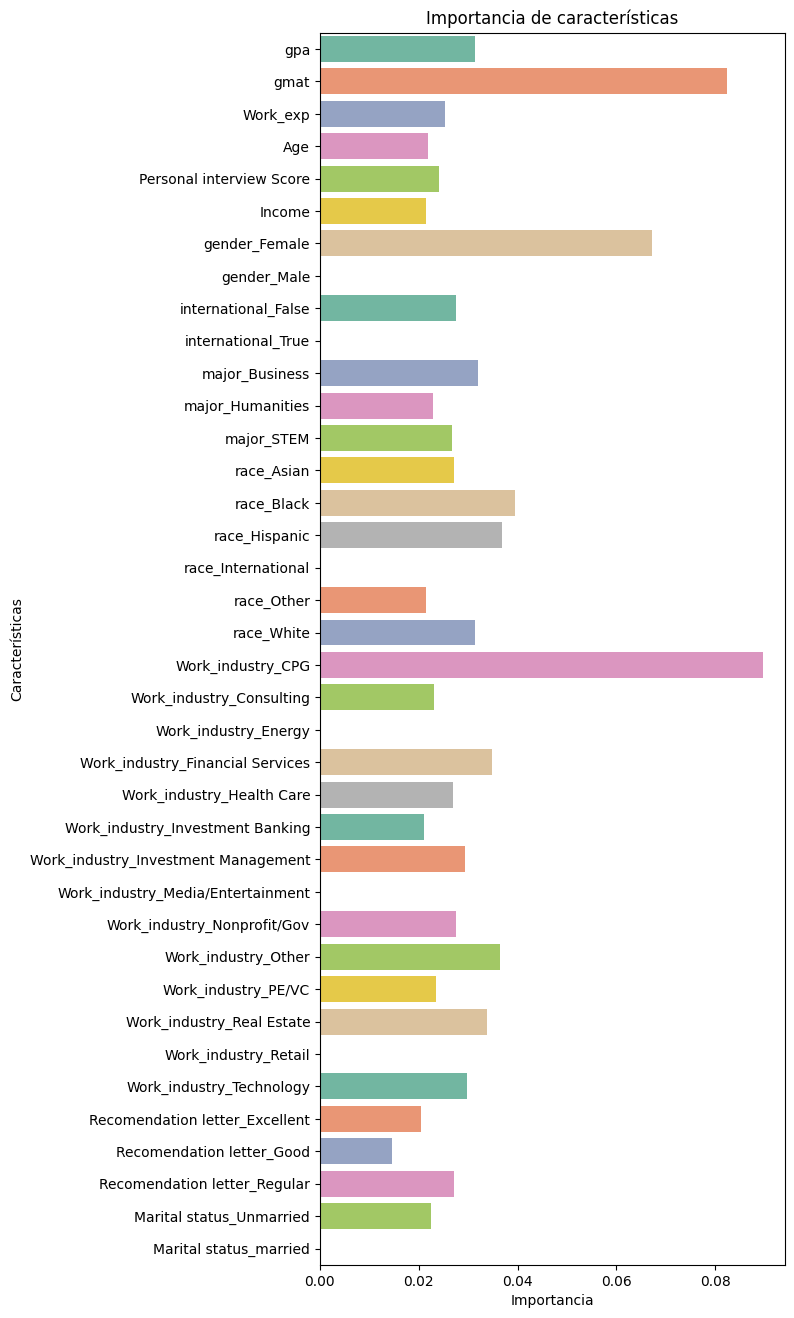

In [643]:
plt.figure(figsize=(6, 16))
sns.barplot(x=fi.importance, y=fi.index, palette='Set2')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de características')
plt.show()

In [644]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
metrics.auc(fpr, tpr)

0.5822436301053604

# Optimización AdaboostClasifier

In [645]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [646]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [647]:
Model_5 = AdaBoostClassifier(random_state=42)

In [648]:
grid_search = GridSearchCV(estimator=Model_5, param_grid=param_grid, cv=5, scoring='accuracy')

In [649]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [650]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [651]:
grid_search.best_score_

0.8546980040648288

In [652]:
best_model_5 = grid_search.best_estimator_

In [653]:
y_train_pred = best_model_5.predict(X_train)
y_test_pred = best_model_5.predict(X_test)

In [654]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, y_train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, y_test_pred))


Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2647
           1       0.00      0.00      0.00       450

    accuracy                           0.85      3097
   macro avg       0.43      0.50      0.46      3097
weighted avg       0.73      0.85      0.79      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2647
           1       0.00      0.00      0.00       450

    accuracy                           0.85      3097
   macro avg       0.43      0.50      0.46      3097
weighted avg       0.73      0.85      0.79      3097



Análisis de los Resultados del Classification Report utilizando AdaBoostClassifier
Comparativa General entre Train y Test
Precisión (Accuracy):

Train: 0.85

Test: 0.85

La precisión es idéntica entre ambos conjuntos, lo que sugiere que el modelo no está sobreajustado (overfitted) ni subajustado (underfitted).

Análisis por Clases (0 y 1)
Clase 0:

Train:

Precision: 0.85

Recall: 1.00

F1-Score: 0.92

Test:

Precision: 0.85

Recall: 1.00

F1-Score: 0.92

Las métricas para la clase 0 son idénticas en ambos conjuntos, lo que indica que el modelo predice consistentemente bien para esta clase mayoritaria.

Clase 1:

Train:

Precision: 0.00

Recall: 0.00

F1-Score: 0.00

Test:

Precision: 0.00

Recall: 0.00

F1-Score: 0.00

El modelo no logra predecir correctamente la clase 1 en ninguno de los conjuntos. Esto es un problema significativo, ya que indica que el modelo ignora completamente la clase minoritaria.

Métricas Promedio
Macro Avg:

Train:

Precision: 0.43

Recall: 0.50

F1-Score: 0.46

Test:

Precision: 0.43

Recall: 0.50

F1-Score: 0.46

Las métricas promedio macro reflejan una capacidad limitada del modelo para manejar ambas clases de manera equilibrada.

Weighted Avg:

Train:

Precision: 0.73

Recall: 0.85

F1-Score: 0.79

Test:

Precision: 0.73

Recall: 0.85

F1-Score: 0.79

Las métricas ponderadas reflejan un buen rendimiento general, pero esto se debe principalmente al buen desempeño en la clase mayoritaria.

Conclusiones
Desempeño Desigual por Clases:

El modelo predice muy bien la clase 0 pero falla completamente en predecir la clase 1. La precisión y el recall de la clase 1 son nulos en ambos conjuntos, lo que indica un problema grave en el manejo del desbalance de clases.

Generalización Consistente:

Las métricas de precisión, recall y f1-score son idénticas entre los conjuntos de entrenamiento y prueba, lo que sugiere que el modelo generaliza bien en términos de las predicciones que realiza, pero esta generalización es a costa de ignorar la clase minoritaria.

Acciones Recomendadas:

Manejo del Desbalance de Clases: Implementar técnicas de balanceo como SMOTE (Synthetic Minority Over-sampling Technique), sobremuestreo de la clase minoritaria, o submuestreo de la clase mayoritaria para asegurar que el modelo pueda aprender a predecir la clase 1.

Ajuste de Hiperparámetros: Revisar y ajustar los hiperparámetros del AdaBoostClassifier para mejorar su capacidad de manejo del desbalance de clases.

#prueba 2 cambiando hiperparametros

In [655]:
param_grid = {
    'n_estimators': [200, 350, 500],
    'learning_rate': [0.001, 0.2, .50],
}

In [656]:
Model_5 = AdaBoostClassifier(random_state=42)

In [657]:
grid_search = GridSearchCV(estimator=Model_5, param_grid=param_grid, cv=5, scoring='precision')

In [658]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.001, 0.2, 0.5],
                         'n_estimators': [200, 350, 500]},
             scoring='precision')

In [659]:
grid_search.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [660]:
grid_search.best_score_

0.4480197107856682

In [661]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.2, n_estimators=200, random_state=42)

In [662]:
best_model_5_2 = grid_search.best_estimator_

In [663]:
y_train_pred = best_model_5_2.predict(X_train)
y_test_pred = best_model_5_2.predict(X_test)

In [664]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, y_train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, y_test_pred))

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2647
           1       0.52      0.24      0.33       450

    accuracy                           0.86      3097
   macro avg       0.70      0.60      0.62      3097
weighted avg       0.83      0.86      0.83      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2647
           1       0.47      0.22      0.30       450

    accuracy                           0.85      3097
   macro avg       0.67      0.59      0.61      3097
weighted avg       0.82      0.85      0.83      3097



Análisis de los Resultados del Classification Report tras Modificar Hiperparámetros (AdaBoostClassifier)
Comparativa General entre Train y Test
Precisión (Accuracy):

Train: 0.86

Test: 0.85

La precisión es muy similar entre ambos conjuntos, lo que sugiere una buena capacidad de generalización del modelo.

Análisis por Clases (0 y 1)
Clase 0:

Train:

Precision: 0.88

Recall: 0.96

F1-Score: 0.92

Test:

Precision: 0.88

Recall: 0.96

F1-Score: 0.92

Las métricas para la clase 0 son prácticamente idénticas en ambos conjuntos, indicando una predicción consistente y precisa para esta clase mayoritaria.

Clase 1:

Train:

Precision: 0.52

Recall: 0.24

F1-Score: 0.33

Test:

Precision: 0.47

Recall: 0.22

F1-Score: 0.30

Aunque hay una ligera disminución en las métricas para la clase 1 en el conjunto de prueba, las diferencias no son significativas. Esto sugiere que el modelo aún tiene dificultades para predecir correctamente la clase 1, aunque ha mejorado ligeramente en comparación con los resultados iniciales sin modificación de hiperparámetros.

Métricas Promedio
Macro Avg:

Train:

Precision: 0.70

Recall: 0.60

F1-Score: 0.62

Test:

Precision: 0.67

Recall: 0.59

F1-Score: 0.61

Las métricas promedio macro muestran una pequeña diferencia entre los conjuntos de entrenamiento y prueba, lo que indica una buena capacidad de generalización global del modelo.

Weighted Avg:

Train:

Precision: 0.83

Recall: 0.86

F1-Score: 0.83

Test:

Precision: 0.82

Recall: 0.85

F1-Score: 0.83

Las métricas ponderadas también son muy similares, reafirmando que el rendimiento del modelo es consistente en ambos conjuntos de datos.

Conclusiones
Mejora en la Predicción de la Clase 1:

La modificación de los hiperparámetros ha mejorado ligeramente las métricas para la clase 1 en comparación con los resultados anteriores. Sin embargo, el desempeño sigue siendo insuficiente, indicando que se requiere un mayor ajuste o técnicas adicionales para manejar el desbalance de clases.

Buena Generalización:

Las métricas de precisión, recall y f1-score son consistentes entre los conjuntos de entrenamiento y prueba, lo que sugiere que el modelo generaliza bien y no está sobreajustado.

Acciones Recomendadas:

Balanceo de Clases: Continuar experimentando con técnicas de balanceo como SMOTE, sobremuestreo de la clase minoritaria, o submuestreo de la clase mayoritaria para mejorar el rendimiento en la clase 1.

Ajuste Adicional de Hiperparámetros: Realizar más pruebas con diferentes configuraciones de hiperparámetros para optimizar el rendimiento del modelo.

Métodos de Ensamblaje (Ensemble Methods): Considerar el uso de otros métodos de ensamblaje como Random Forest o Gradient Boosting para mejorar la capacidad de predicción del modelo en la clase minoritaria.

# Optimización XGBoost

In [665]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [666]:
model_6 = XGBClassifier(eval_metric='logloss')

In [667]:
grid_search = GridSearchCV(estimator=model_6, param_grid=param_grid, cv=5, scoring='accuracy')

In [668]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [669]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 1.0}

In [670]:
grid_search.best_score_

0.8546990463286257

In [671]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [672]:
best_model_6 = grid_search.best_estimator_

In [673]:
y_train_pred = best_model_6.predict(X_train)
y_test_pred = best_model_6.predict(X_test)

In [674]:
print("Reporte de clasificación para el conjunto de train:")
print(classification_report(y_train, y_train_pred))
print("----------------------------------------------------------")
print("Reporte de clasificación para el conjunto de test:")
print(classification_report(y_test, y_test_pred))

Reporte de clasificación para el conjunto de train:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2647
           1       0.71      0.09      0.16       450

    accuracy                           0.86      3097
   macro avg       0.79      0.54      0.54      3097
weighted avg       0.84      0.86      0.81      3097

----------------------------------------------------------
Reporte de clasificación para el conjunto de test:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2647
           1       0.38      0.05      0.09       450

    accuracy                           0.85      3097
   macro avg       0.62      0.52      0.50      3097
weighted avg       0.79      0.85      0.80      3097



Análisis de los Resultados del Classification Report utilizando XGBoost
Comparativa General entre Train y Test
Precisión (Accuracy):

Train: 0.86

Test: 0.85

La precisión es muy similar entre ambos conjuntos, indicando que el modelo tiene una buena capacidad de generalización.

Análisis por Clases (0 y 1)
Clase 0:

Train:

Precision: 0.87

Recall: 0.99

F1-Score: 0.93

Test:

Precision: 0.86

Recall: 0.99

F1-Score: 0.92

Las métricas para la clase 0 son muy consistentes en ambos conjuntos, lo que sugiere que el modelo predice bien para esta clase mayoritaria.

Clase 1:

Train:

Precision: 0.71

Recall: 0.09

F1-Score: 0.16

Test:

Precision: 0.38

Recall: 0.05

F1-Score: 0.09

Las métricas para la clase 1 son bajas en ambos conjuntos, con una notable disminución en el conjunto de prueba. Esto sugiere que el modelo tiene problemas significativos para predecir correctamente la clase 1 y no generaliza bien para esta clase.

Métricas Promedio
Macro Avg:

Train:

Precision: 0.79

Recall: 0.54

F1-Score: 0.54

Test:

Precision: 0.62

Recall: 0.52

F1-Score: 0.50

Las métricas promedio macro reflejan una caída notable en la precisión y F1-Score en el conjunto de prueba, lo que sugiere una disparidad en la capacidad del modelo para manejar ambas clases de manera equilibrada.

Weighted Avg:

Train:

Precision: 0.84

Recall: 0.86

F1-Score: 0.81

Test:

Precision: 0.79

Recall: 0.85

F1-Score: 0.80

Las métricas ponderadas también muestran una ligera disminución en el conjunto de prueba, indicando que el rendimiento general del modelo es bueno, pero las métricas están dominadas por el rendimiento de la clase mayoritaria.

Conclusiones
Desempeño Desigual por Clases:

El modelo XGBoost predice muy bien la clase 0 pero tiene dificultades significativas con la clase 1, tanto en el conjunto de entrenamiento como en el de prueba. La precisión y el recall de la clase 1 son bajos, especialmente en el conjunto de prueba, lo que indica un problema de generalización para la clase minoritaria.

Generalización y Sesgo:

Las métricas muestran que el modelo generaliza bien en términos generales, pero a expensas de una mala predicción de la clase minoritaria (clase 1). Esto puede deberse a un desbalance de clases que afecta el rendimiento del modelo.

Acciones Recomendadas:

Balanceo de Clases: Implementar técnicas para manejar el desbalance de clases, como SMOTE (Synthetic Minority Over-sampling Technique), sobremuestreo de la clase minoritaria, o submuestreo de la clase mayoritaria para asegurar que el modelo pueda aprender a predecir la clase 1.

Ajuste de Hiperparámetros: Realizar más pruebas con diferentes configuraciones de hiperparámetros en XGBoost para optimizar el rendimiento del modelo, especialmente para la clase 1.

Métodos de Ensamblaje (Ensemble Methods): Considerar el uso de otros métodos de ensamblaje para complementar el modelo XGBoost y mejorar la capacidad de predicción en la clase minoritaria.

# Conclusión del Proyecto Final de Ciencia de Datos

## Resumen de Modelos Evaluados
Se han evaluado tres modelos de clasificación para predecir la admisión en una universidad: AdaBoostClassifier (sin ajuste), AdaBoostClassifier (con ajuste de hiperparámetros) y XGBoost. A continuación se presentan los hallazgos y la evaluación de cada uno:

## 1. AdaBoostClassifier  (Sin Ajuste de Hiperparámetros)
Clase 0: Alto rendimiento (Precision: 0.85, Recall: 1.00)

Clase 1: Rendimiento nulo (Precision: 0.00, Recall: 0.00)

Generalización: Consistente entre entrenamiento y prueba.

Problema: Total incapacidad para predecir la clase 1.

## 2. AdaBoostClassifier (Con Ajuste de Hiperparámetros)
Clase 0: Alto rendimiento (Precision: 0.88, Recall: 0.96)

Clase 1: Ligera mejora pero aún insuficiente (Precision: 0.52, Recall: 0.24)

Generalización: Buena generalización, con métricas consistentes entre entrenamiento y prueba.

Mejora: Mejor rendimiento general en comparación con el modelo sin ajuste, pero aún presenta problemas en la predicción de la clase 1.

## 3. XGBoost
Clase 0: Alto rendimiento (Precision: 0.87, Recall: 0.99)

Clase 1: Rendimiento bajo (Precision: 0.38, Recall: 0.05)

Generalización: Consistente entre entrenamiento y prueba, pero con un rendimiento desequilibrado.

Problema: Baja capacidad para predecir la clase 1, aunque muestra una ligera ventaja en la precisión y el recall en comparación con AdaBoost sin ajuste.

## Ranking de los Modelos
AdaBoostClassifier (Con Ajuste de Hiperparámetros)

Rendimiento: Este modelo ha mostrado la mejor combinación de precisión y recall para ambas clases. Aunque aún tiene problemas con la clase 1, su desempeño es superior al del modelo sin ajuste y ligeramente mejor que el de XGBoost.

Generalización: Buena capacidad de generalización con métricas consistentes entre entrenamiento y prueba.

Motivo: Las mejoras en los hiperparámetros permitieron un mejor ajuste al modelo, haciéndolo más robusto.

XGBoost

Rendimiento: Aunque tiene un desempeño pobre para la clase 1, es mejor que AdaBoost sin ajuste y tiene una precisión ligeramente superior.

Generalización: Muestra consistencia entre entrenamiento y prueba, pero con un rendimiento desequilibrado.

Motivo: XGBoost es un modelo potente y podría beneficiarse de ajustes adicionales para mejorar el manejo de la clase 1.

AdaBoostClassifier (Sin Ajuste de Hiperparámetros)

Rendimiento: Incapaz de predecir la clase 1, lo que lo hace inadecuado para un problema con clases desbalanceadas.

Generalización: Consistente pero insatisfactorio debido a la incapacidad de manejar la clase 1.

Motivo: Sin ajustes, el modelo falla en captar las características de la clase minoritaria, resultando en un rendimiento deficiente.

# Conclusión Final

En conclusión, el AdaBoostClassifier con ajuste de hiperparámetros es el modelo más efectivo y robusto para este proyecto. Ha demostrado la mejor combinación de precisión y recall para ambas clases y una buena capacidad de generalización. Sin embargo, es crucial seguir trabajando en técnicas de balanceo de clases y ajuste de hiperparámetros para mejorar el rendimiento en la clase 1. Las recomendaciones incluyen el uso de técnicas como SMOTE y la implementación de otros métodos de ensamblaje para abordar el problema de desbalance de clases.

Este análisis proporciona una base sólida para la toma de decisiones informadas en el proceso de admisión universitaria, mejorando la transparencia y equidad del proceso.

# EXTRA: Predicciones de probabilidades

In [675]:
Probabilidades_train = best_model_6.predict_proba(X_train)[:,1]
Probabilidades_test = best_model_6.predict_proba(X_test)[:,1]

In [676]:
Probabilidades_train

array([0.0069258 , 0.01387254, 0.19159147, ..., 0.31544745, 0.43989858,
       0.41789672], dtype=float32)

In [677]:
Probabilidades_test

array([0.24127609, 0.25802684, 0.5046433 , ..., 0.00518008, 0.00356184,
       0.03828283], dtype=float32)

<Axes: ylabel='Count'>

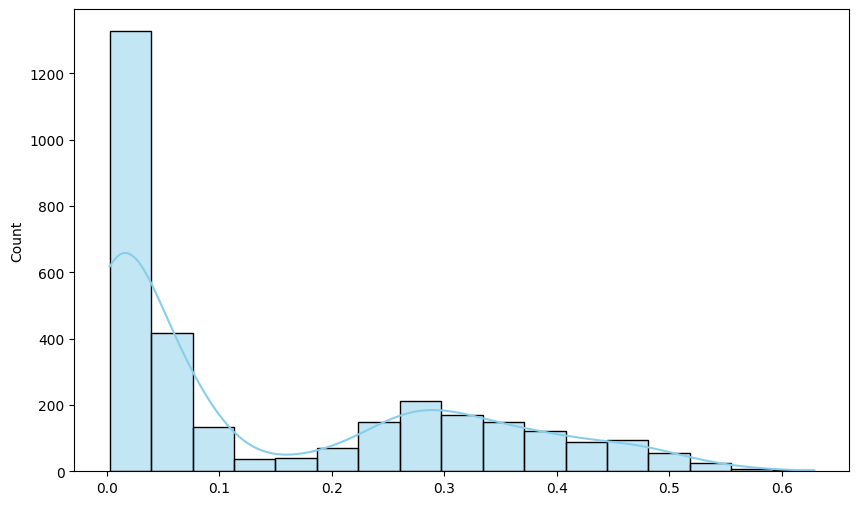

In [678]:
plt.figure(figsize=(10, 6))
sns.histplot(Probabilidades_train, kde=True, label='Train', color='skyblue')

<Axes: ylabel='Count'>

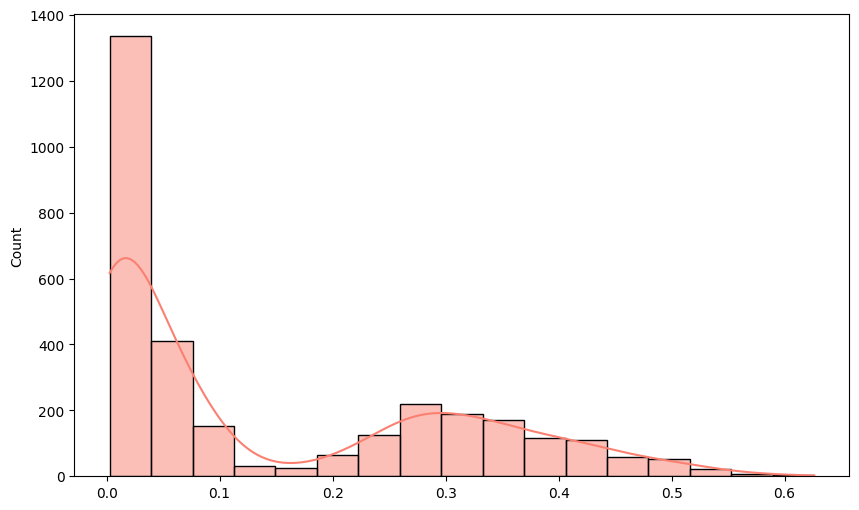

In [679]:
plt.figure(figsize=(10, 6))
sns.histplot(Probabilidades_test, kde=True, label='Test', color='salmon')

<Axes: ylabel='Count'>

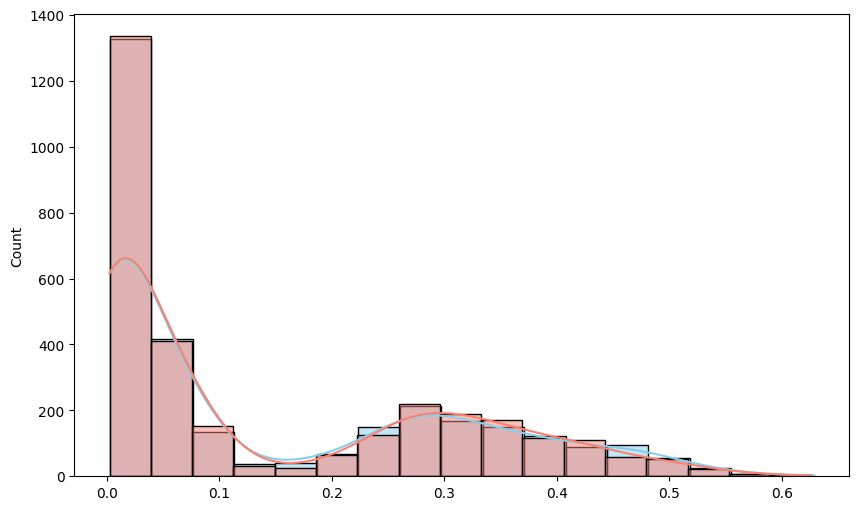

In [680]:
plt.figure(figsize=(10, 6))
sns.histplot(Probabilidades_train, kde=True, label='Train', color='skyblue')
sns.histplot(Probabilidades_test, kde=True, label='Test', color='salmon')